# Noise Analysis
In thi notebook we test the effect of noisy inputs to the model.

In [14]:

%reload_ext autoreload
%autoreload 2

from torchvision import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
import ast
import os
import sys
from statistics import mean
import torch
import warnings

# import modules from RN08 model
module_path = os.path.abspath(os.path.join('../../workspace/models/rn08/code/')) # or the path to your source code
sys.path.insert(0, module_path)
import rn08



## Utility methods

In [15]:
def plot_2d_heatmap(values, 
                    title, 
                    min_max=(0, 1), 
                    x_label='Layers', 
                    y_label='Layers', 
                    scale_label='Value', 
                    cmap='Greens',
                    show_value=True):
    '''
    Method used to plot a 2D heatmap using Seaborn.
    '''
    # Set up the figure and axes
    plt.figure(figsize=(7, 6))

    # Create a heatmap using Seaborn
    sns.heatmap(values, 
                cmap=cmap, 
                annot=show_value, 
                fmt=".2f", 
                vmin=min_max[0], 
                vmax=min_max[1],
                cbar_kws={'label': scale_label})

    # Customize the plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Display the plot
    plt.show()
    
def read_file(path):
    
    try:
        emd_file = open(path)
        emd_text = emd_file.read()
        emd_file.close()
        if not emd_text.startswith('['):
            return float(emd_text)
        emd = ast.literal_eval(emd_text)
        return emd[0]['AVG_EMD']
        
    except Exception as e:
        warnings.warn("Warning: " + path + " not found!")
        


In [16]:
# search space
batch_sizes = [16, 32, 64, 128, 256, 512, 1024]
learning_rates = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]
precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [17]:
def get_emd(path, batch_size, learning_rate, precision, size, num_tests=3):
    EMDs = []

    for i in range(1, num_tests + 1):
        file_path = os.path.join(path, f'bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}/{size}_emd_{i}.txt')
        try:
            with open(file_path) as emd_file:
                emd_text = emd_file.read()
                emd_data = ast.literal_eval(emd_text)
                emd = emd_data[0]['AVG_EMD']
                EMDs.append(emd)
        except FileNotFoundError:
            continue
        except Exception as e:
            warnings.warn(f"An error occurred while processing {file_path}: {e}")
            continue
    
    if not EMDs:
        warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
        return -1
    
    return mean(EMDs)


def get_emd_with_noise(path, batch_size, learning_rate, precision, size, noise_type, percentage):
    '''
    Return the EMD achieved by the Model with a certain level of noise
    '''

    file_path = os.path.join(
                path,
                f'bs{batch_size}_lr{learning_rate}/' \
                f'ECON_{precision}b/{size}/emd_{noise_type}_{percentage}.txt'
        ) 
    
    noise_emd = -1
    try:
        emd_file = open(file_path)
        emd_text = emd_file.read()
        if not emd_text.startswith('['):
            noise_emd = float(emd_text)
        else:
            emd = ast.literal_eval(emd_text)
            noise_emd = emd[0]['AVG_EMD']
        emd_file.close()
    except Exception as e:
        # warnings.warn("Warning: " + file_path + " not found!")
        return -1
    return noise_emd

# ECON model (Autoencoder)
we focus our analysis on the encoder which will be deploy on an ASIC.

In [18]:
DATA_PATH = '/data/tbaldi/work/checkpoint/'
DATASET_DIR = '../../data/ECON/Elegun'
DATASET_FILE = 'nELinks5.npy'

size = 'baseline'

## EMD results

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


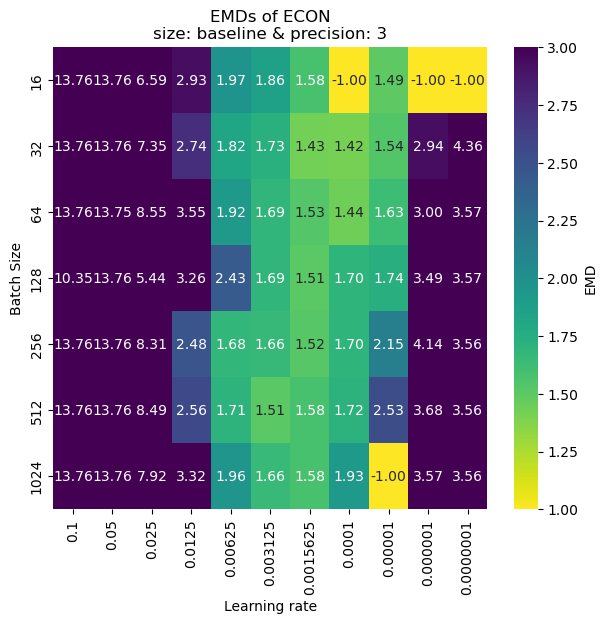

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


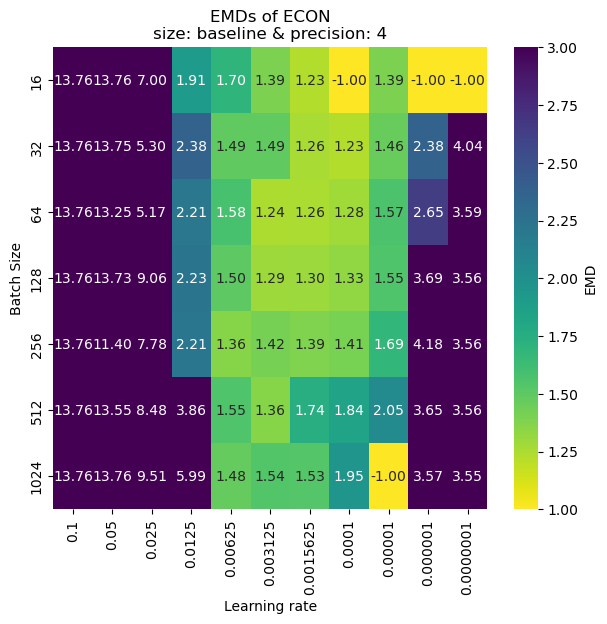

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


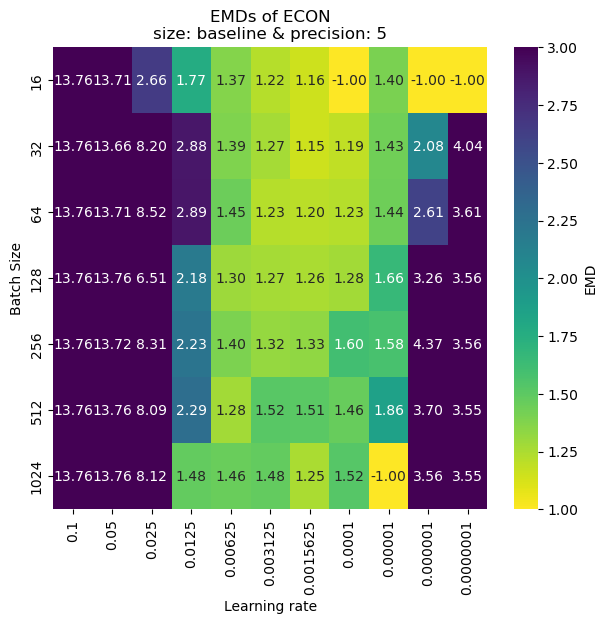

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


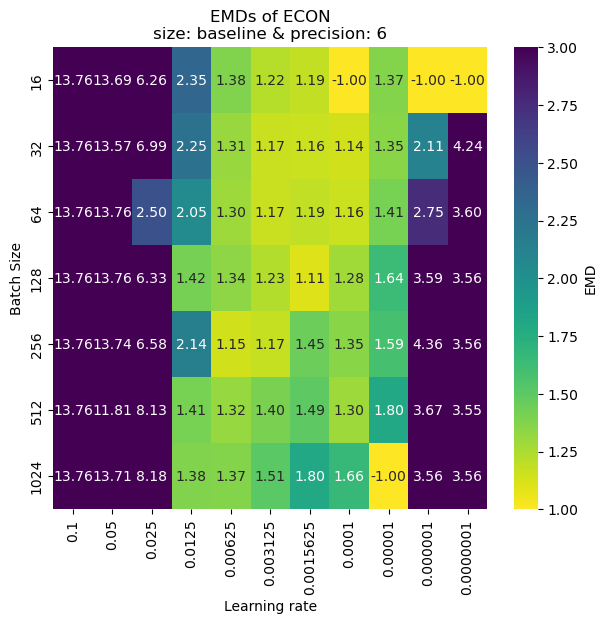

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


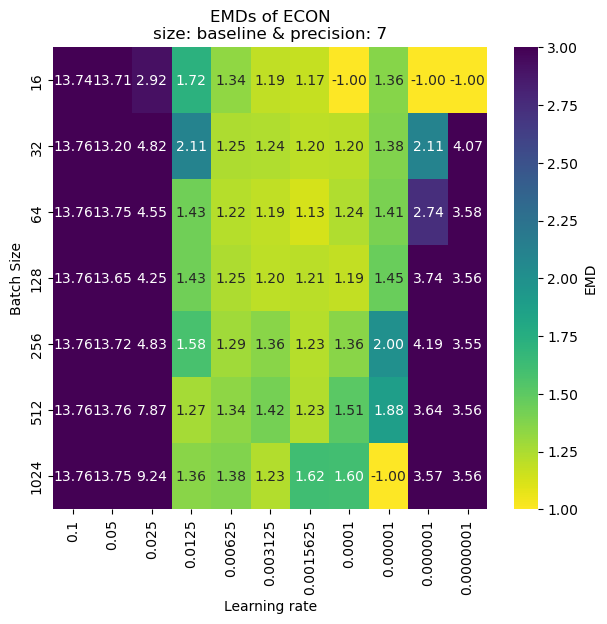

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


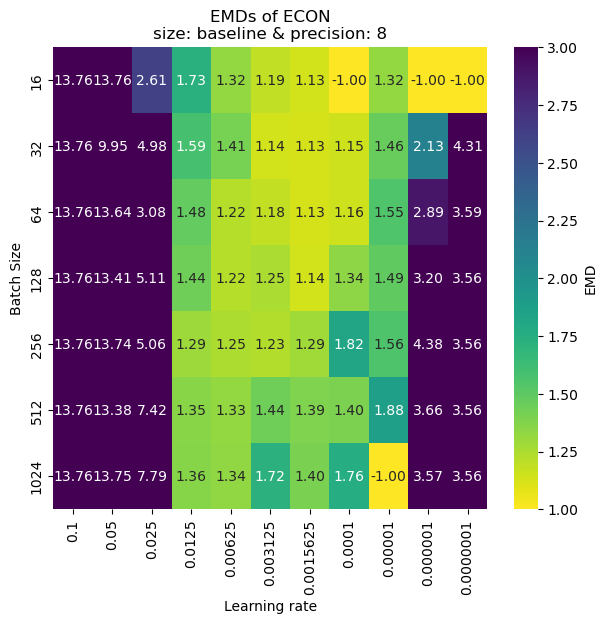

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


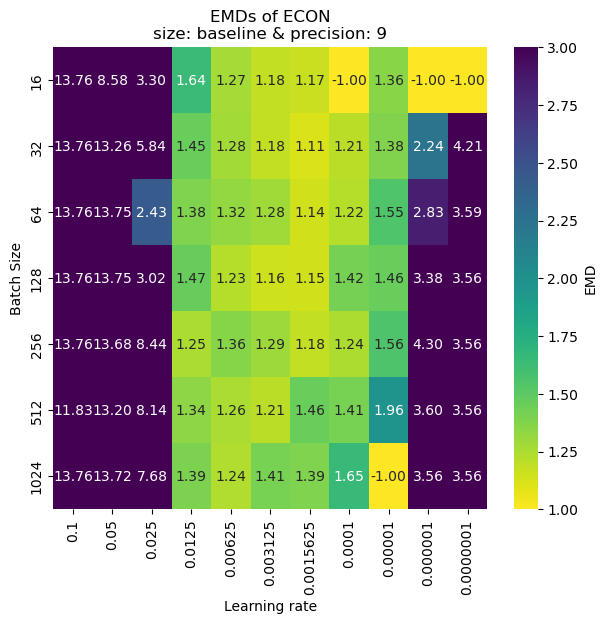

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


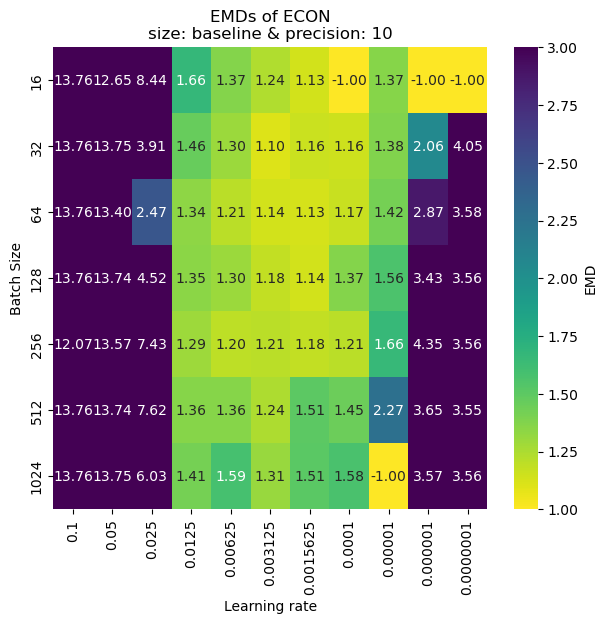

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


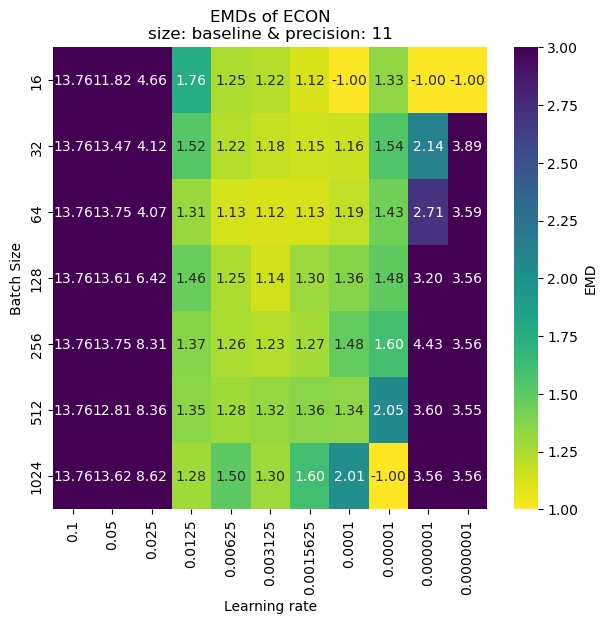

In [19]:
# plotting a heat map per layer
for p in precisions:
    EMD_matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    for x, bs in enumerate(batch_sizes):
        for y, lr in enumerate(learning_rates):
            mean_EMD= get_emd(DATA_PATH, bs, lr, p, size)
            EMD_matrix[x, y] = mean_EMD
            
            
    EMD_matrix = pd.DataFrame(EMD_matrix, 
                              index=batch_sizes, 
                              columns=learning_rates)
    
    plot_2d_heatmap(EMD_matrix, 
                    f'EMDs of ECON\nsize: {size} & precision: {p}', 
                    (1, 3),
                    'Learning rate',
                    'Batch Size',
                    'EMD',
                    cmap='viridis_r')

Let's remove high learning rates from next analysis:

In [20]:
emd_distribution = []
for p in precisions:
    EMD_matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    for x, bs in enumerate(batch_sizes):
        for y, lr in enumerate(learning_rates):
            mean_EMD = get_emd(DATA_PATH, bs, lr, p, size)
            EMD_matrix[x, y] = mean_EMD
            emd_distribution.append({
                'precision': p, 
                'EMD': mean_EMD,
                'batch_size': str(bs),
                'learning_rate': str(lr),
            })

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478

In [21]:
emd_distribution_df = pd.DataFrame(emd_distribution)
emd_distribution_df = emd_distribution_df.sort_values(by='EMD', ascending=True)

## Scientific Benchmark

In [22]:
precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
noise_type = 'gaussian'

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.00001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/280047844

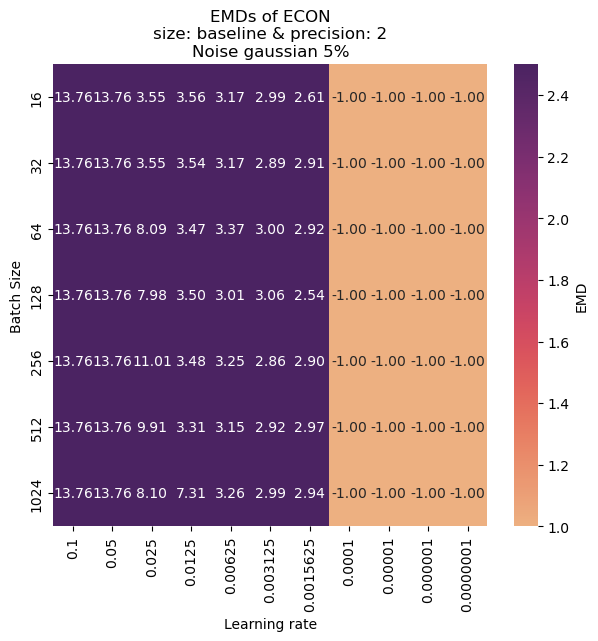

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


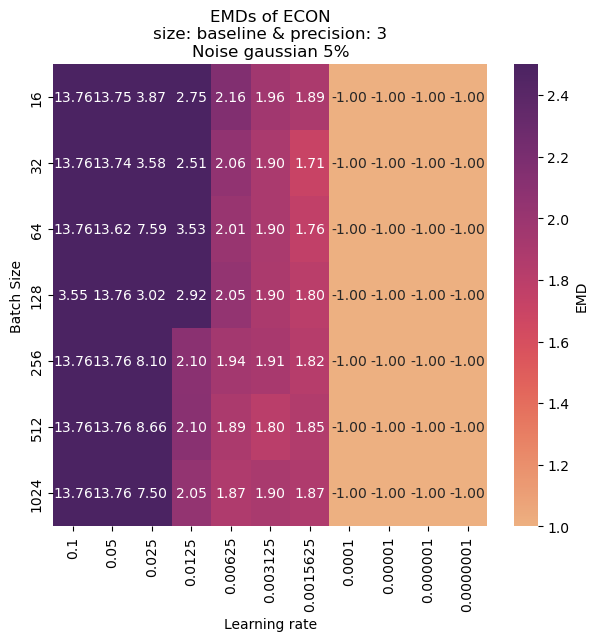

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


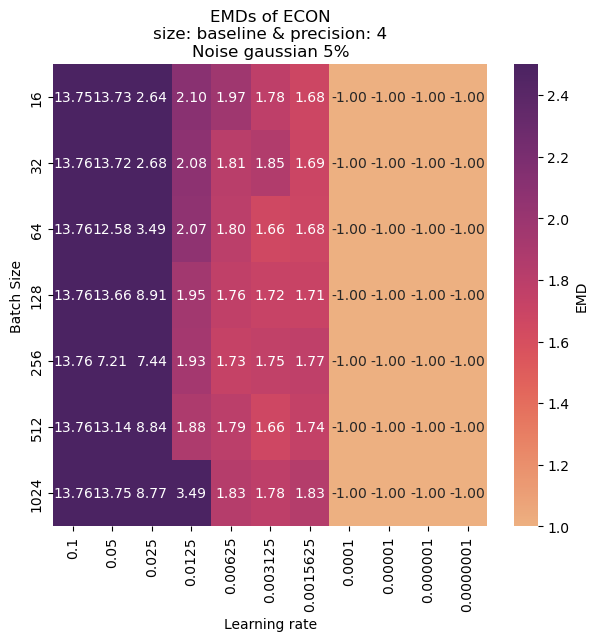

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


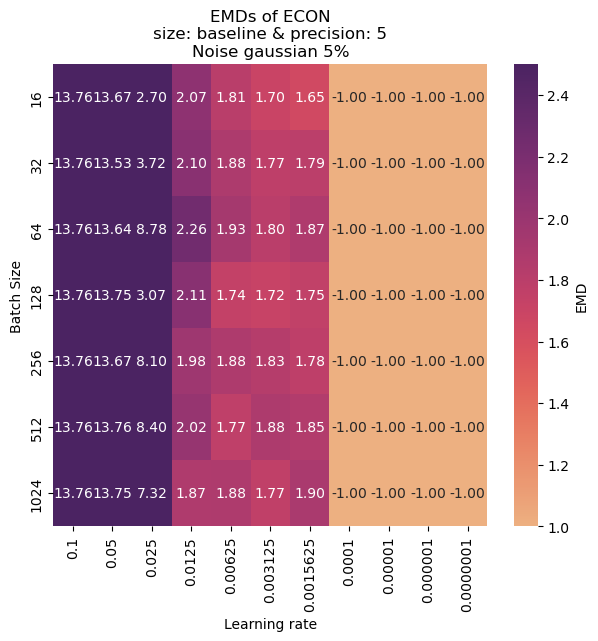

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


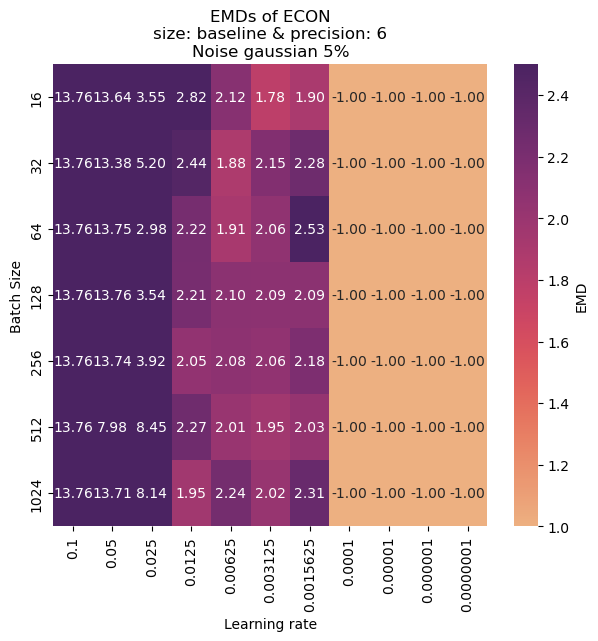

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


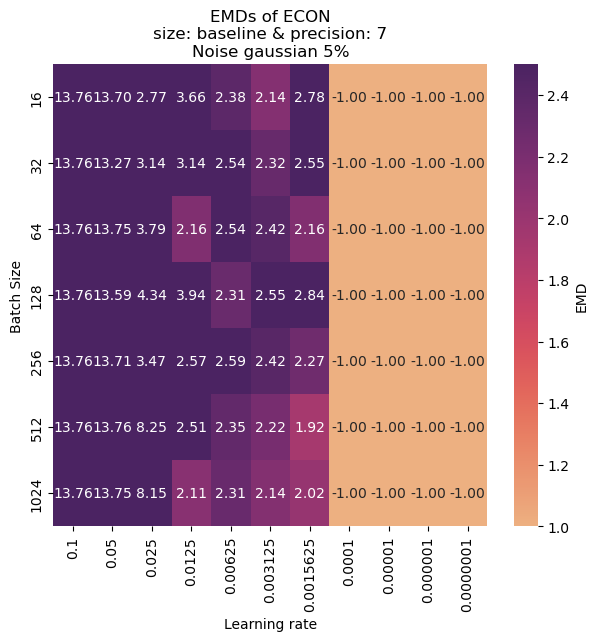

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


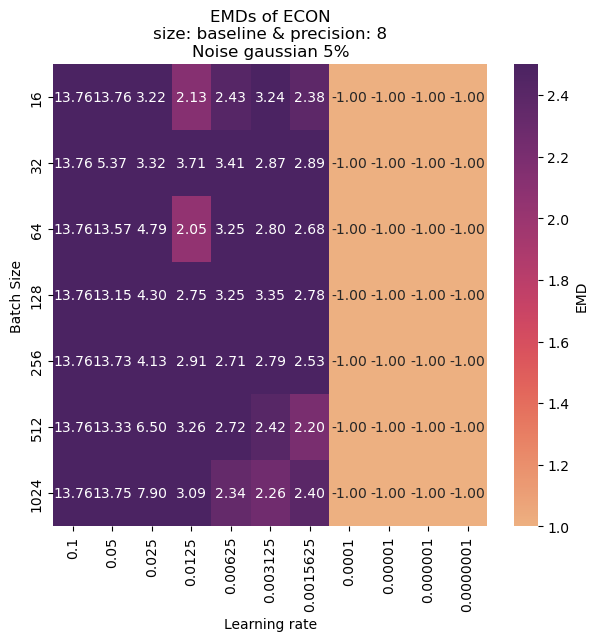

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


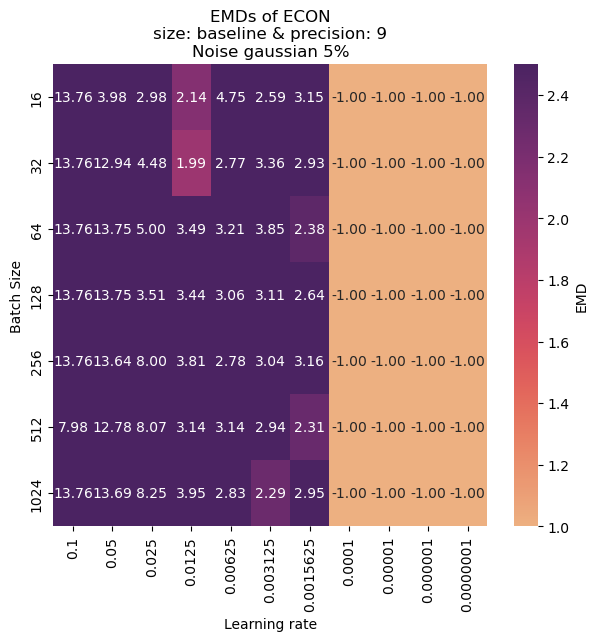

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


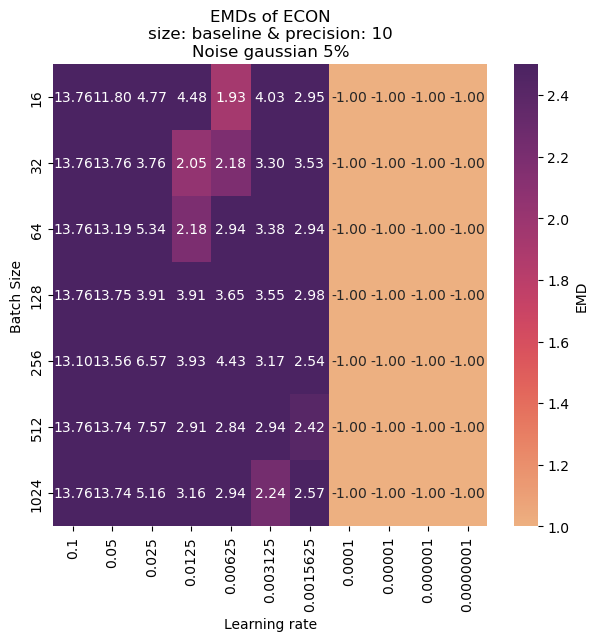

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


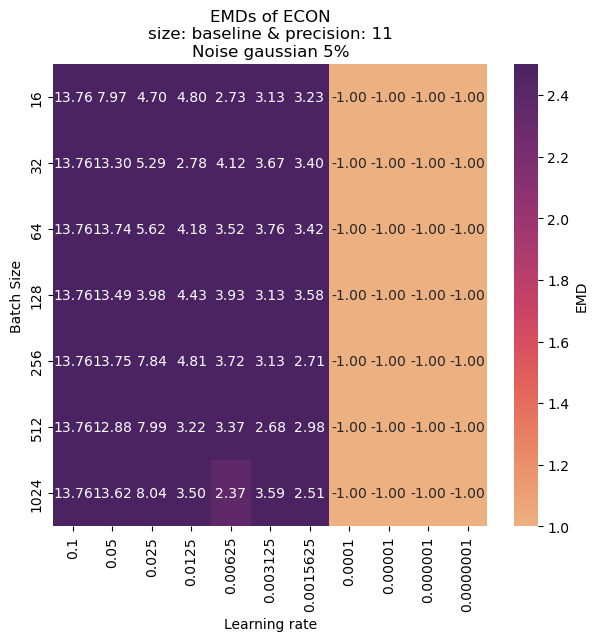

In [25]:
emd_distribution = []
for p in precisions:
    EMD_matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    for x, bs in enumerate(batch_sizes):
        for y, lr in enumerate(learning_rates):
            # get teh noise values
            noise_emd_5 = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, 5)
            noise_emd_10 = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, 10)
            noise_emd_15 = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, 15)
            noise_emd_20 = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, 20)
            original_emd = get_emd(DATA_PATH, bs, lr, p, size)
            
            # build the matrix for the heatmap
            EMD_matrix[x, y] = noise_emd_5
            
            # store the values for the plots
            emd_distribution.append({
                'precision': p, 
                'emd': original_emd,
                # 'noise 5%': (noise_emd_5 - original_emd) * 100 / original_emd,
                # 'noise 10%': (noise_emd_10 - original_emd) * 100 / original_emd,
                # 'noise 15%': (noise_emd_15 - original_emd) * 100 / original_emd,
                # 'noise 20%': (noise_emd_20 - original_emd) * 100 / original_emd,
                'noise 5%': noise_emd_5,
                'noise 10%': noise_emd_10,
                'noise 15%': noise_emd_15,
                'noise 20%': noise_emd_20,
                'batch_size': str(bs),
                'learning_rate': str(lr),
                'precision': p,
            })
            
    # heat map of the EMD with noise as input per precision
    EMD_matrix = pd.DataFrame(EMD_matrix, 
                              index=batch_sizes, 
                              columns=learning_rates)
    
    plot_2d_heatmap(EMD_matrix, 
                    f'EMDs of ECON\nsize: {size} & precision: {p}\n' \
                    f'Noise {noise_type} 5%', 
                    (1, 2.5),
                    'Learning rate',
                    'Batch Size',
                    'EMD',
                    cmap='flare')
        

In [26]:
emd_distribution_df = pd.DataFrame(emd_distribution)
# export the CSV
emd_distribution_df.to_csv("./results/econ/noise.csv", index=False)

We want to plot the heatmap based on the precision, because the batch size is not correlated with the EMD and the noise.

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:1

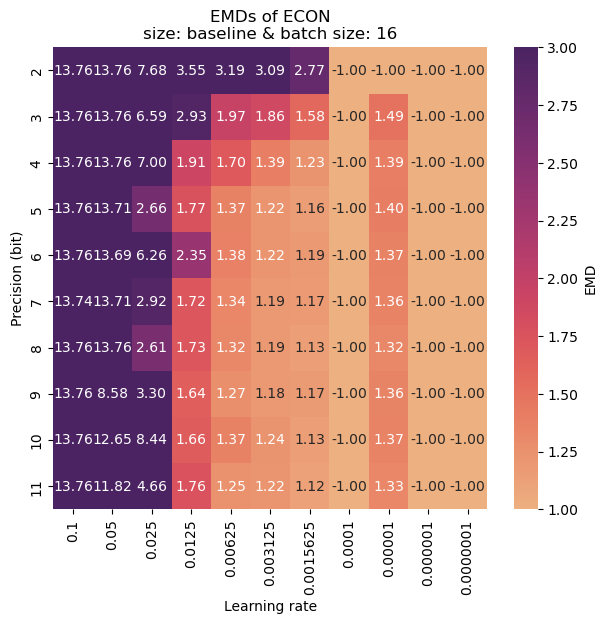

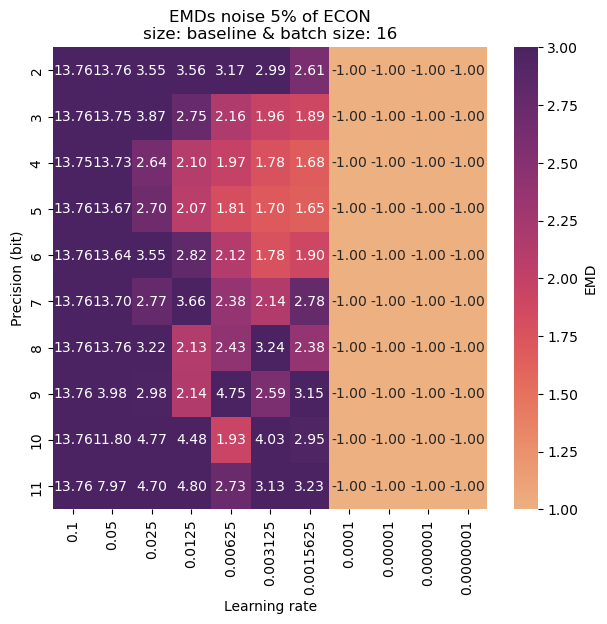

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs32_lr0.0001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs32_lr0.00001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs32_lr0.000001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs32_lr0.0000001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


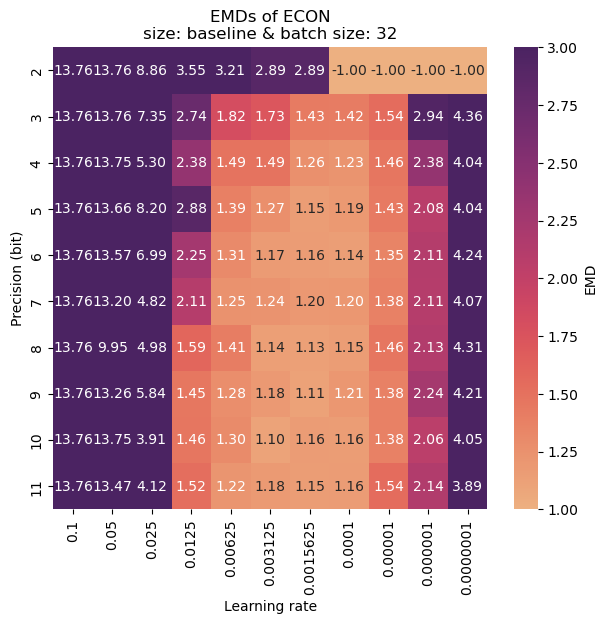

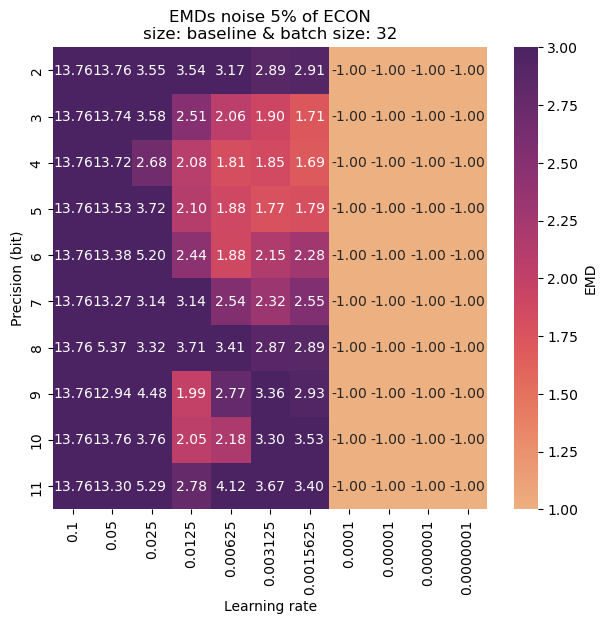

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs64_lr0.0001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs64_lr0.00001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs64_lr0.000001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs64_lr0.0000001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


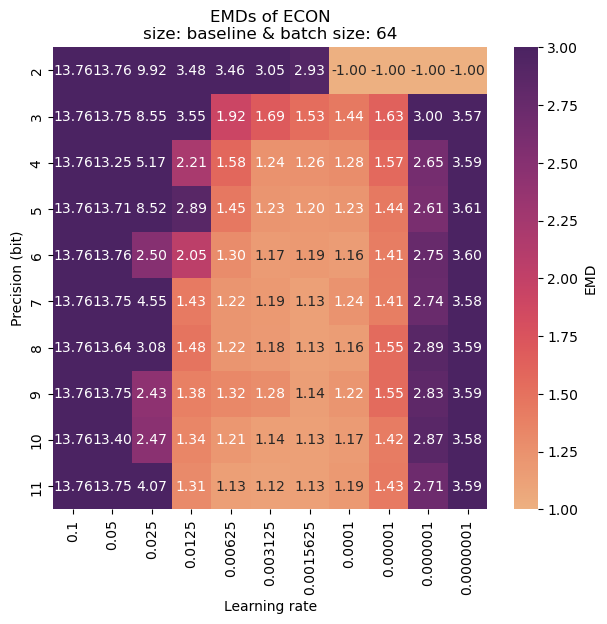

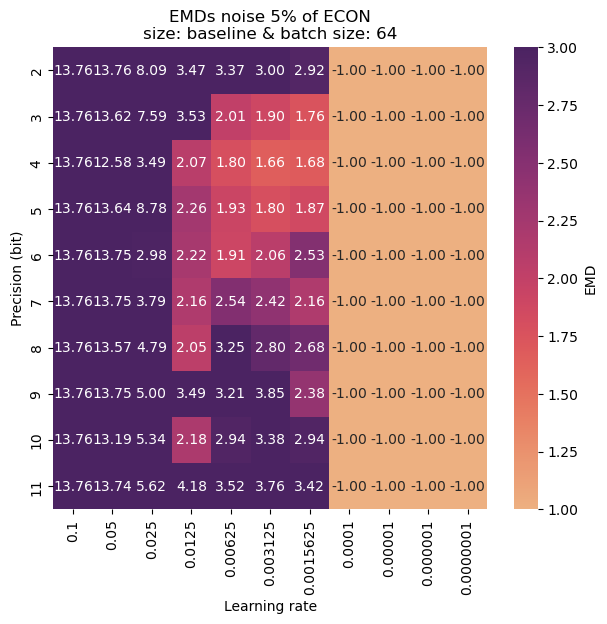

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs128_lr0.0001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs128_lr0.00001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs128_lr0.000001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs128_lr0.0000001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


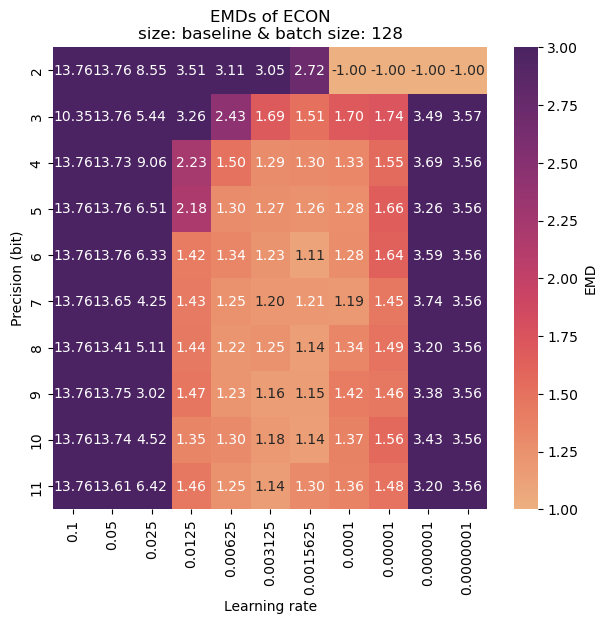

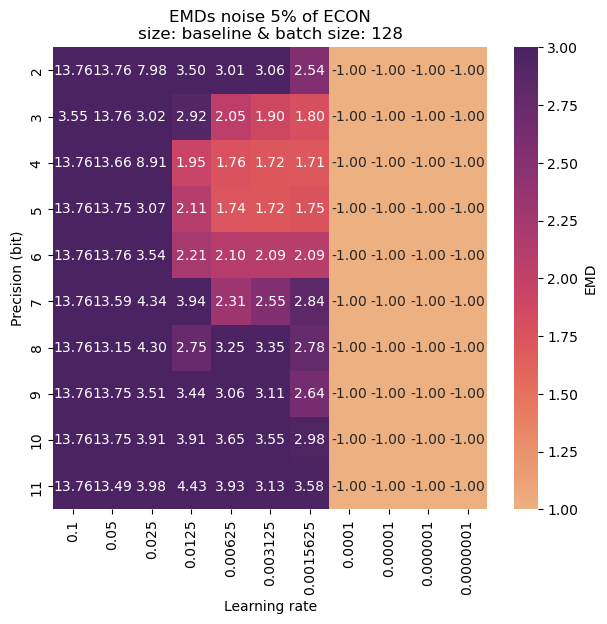

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs256_lr0.0001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs256_lr0.00001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs256_lr0.000001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs256_lr0.0000001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


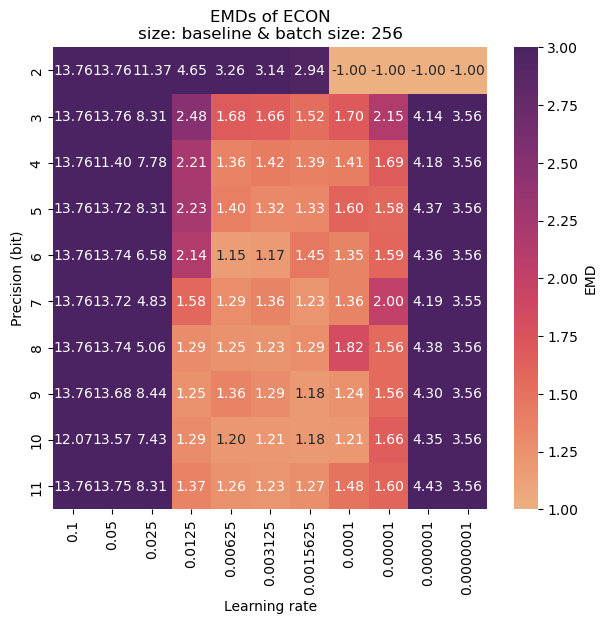

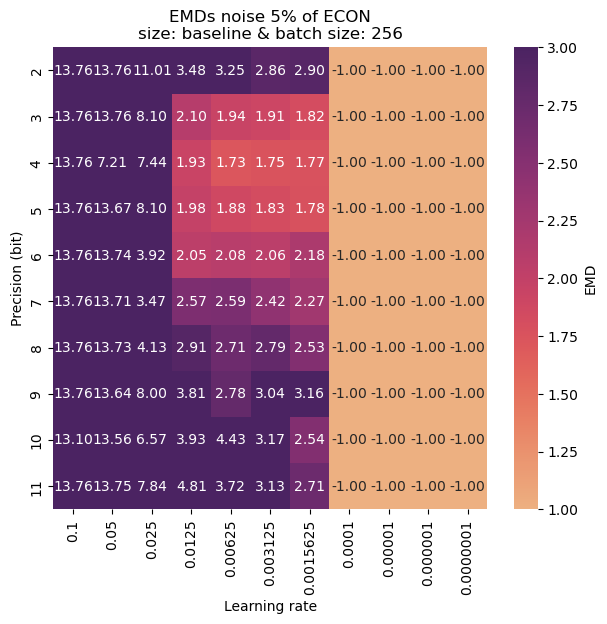

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs512_lr0.0001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs512_lr0.00001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs512_lr0.000001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs512_lr0.0000001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


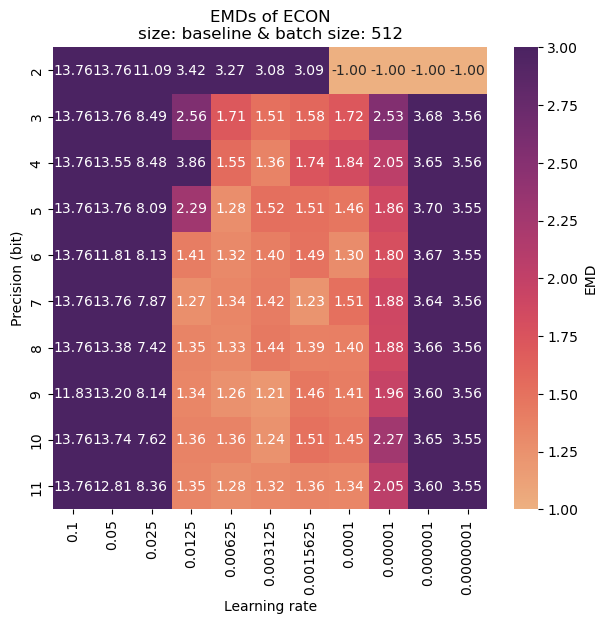

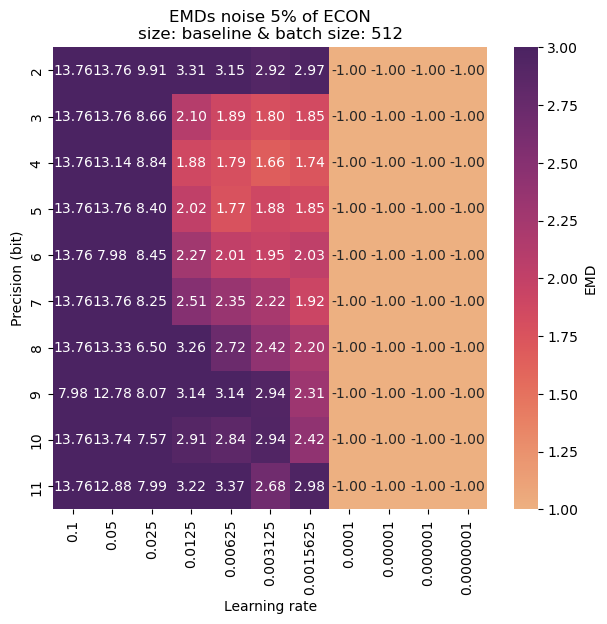

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.0001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs1024_lr0.00001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800

--------------------------------------------------------------------------------


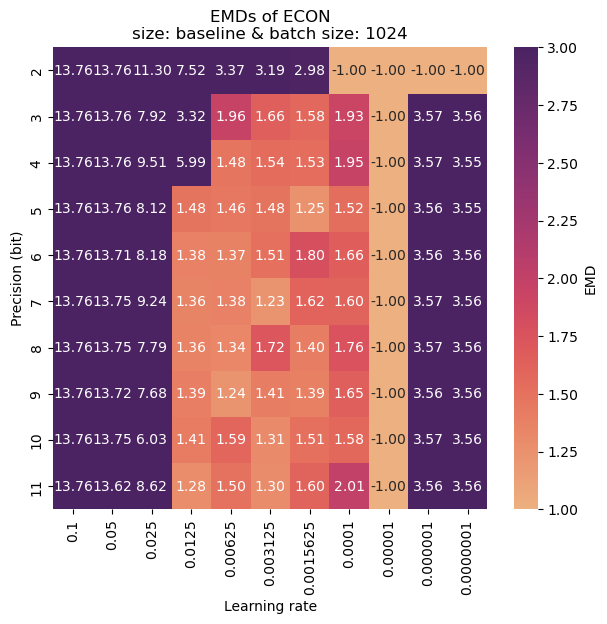

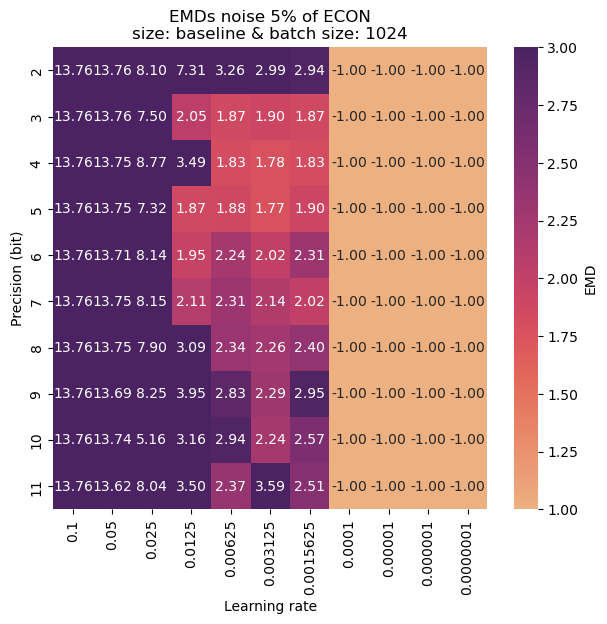

In [28]:

for bs in batch_sizes:
    matrix = np.zeros((len(precisions), len(learning_rates)))
    noise_matrix = np.zeros((len(precisions), len(learning_rates)))
    for y, lr in enumerate(learning_rates):
        for x, p in enumerate(precisions):
            
            # get the performances with and without noise
            mean_emd = get_emd(DATA_PATH, bs, lr, p, size)
            noise_emd_5 = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, 5)
            
            # build the heatmap matrix
            matrix[x, y] = mean_emd
            noise_matrix[x, y] = noise_emd_5

            
    # plot the heatmaps per precision
    matrix = pd.DataFrame(matrix, 
                          index=precisions, 
                          columns=learning_rates)
    noise_matrix = pd.DataFrame(noise_matrix, 
                          index=precisions, 
                          columns=learning_rates)
    print(80*'-')
    plot_2d_heatmap(matrix, 
                    f'EMDs of ECON\nsize: {size} & batch size: {bs}', 
                    (1, 3),
                    'Learning rate',
                    'Precision (bit)',
                    'EMD',
                    cmap='flare')
    
    plot_2d_heatmap(noise_matrix, 
                    f'EMDs noise 5% of ECON\nsize: {size} & batch size: {bs}', 
                    (1, 3),
                    'Learning rate',
                    'Precision (bit)',
                    'EMD',
                    cmap='flare')
    

--------------------------------------------------------------------------------


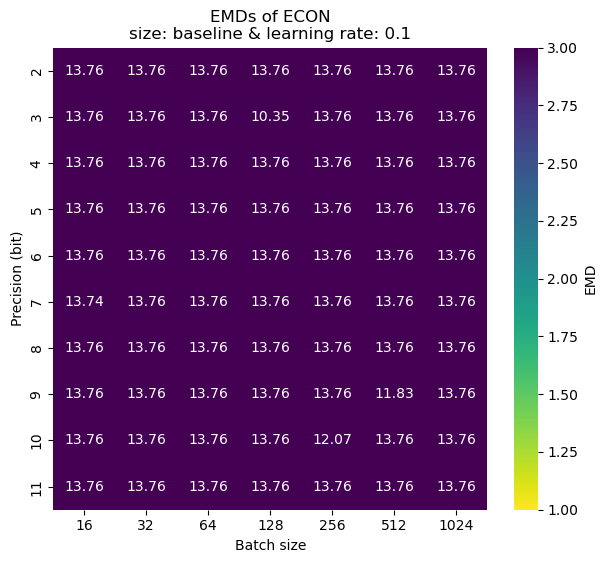

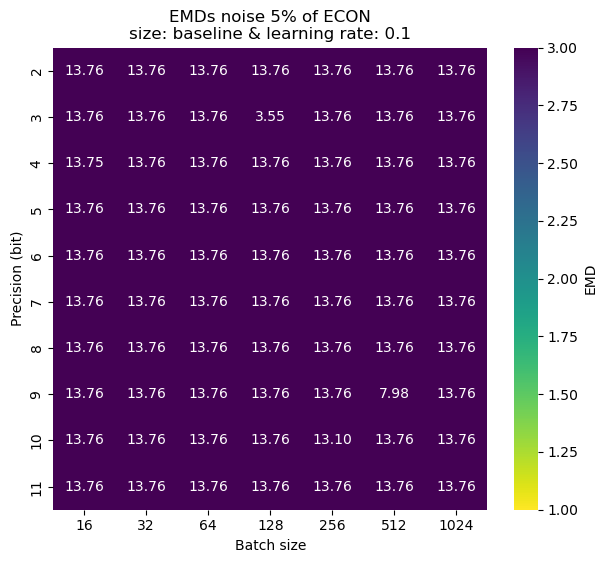

--------------------------------------------------------------------------------


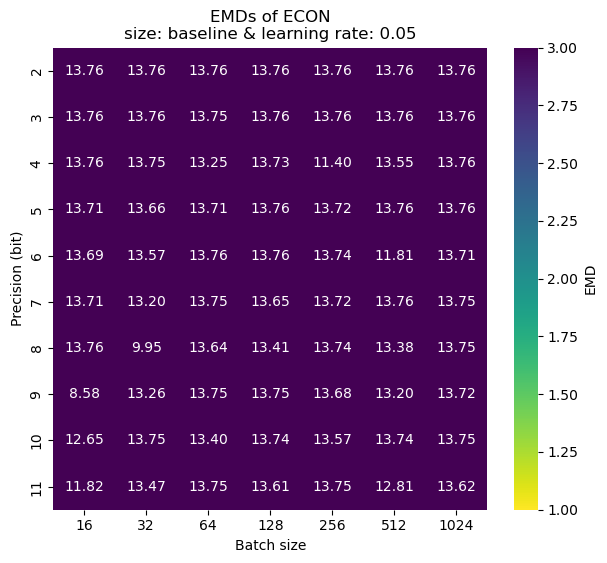

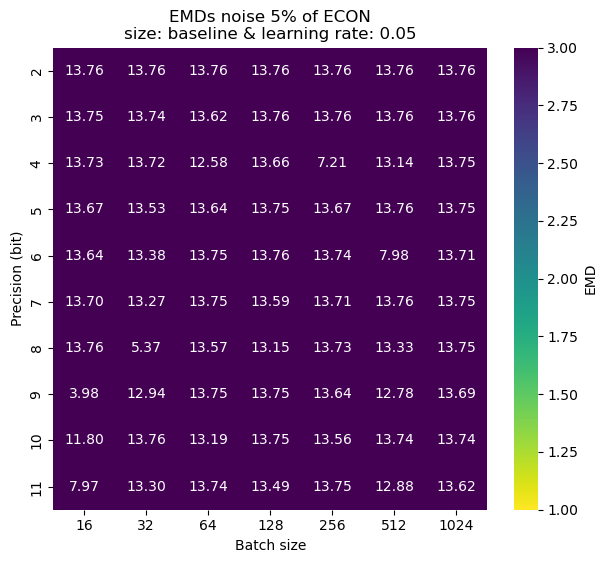

--------------------------------------------------------------------------------


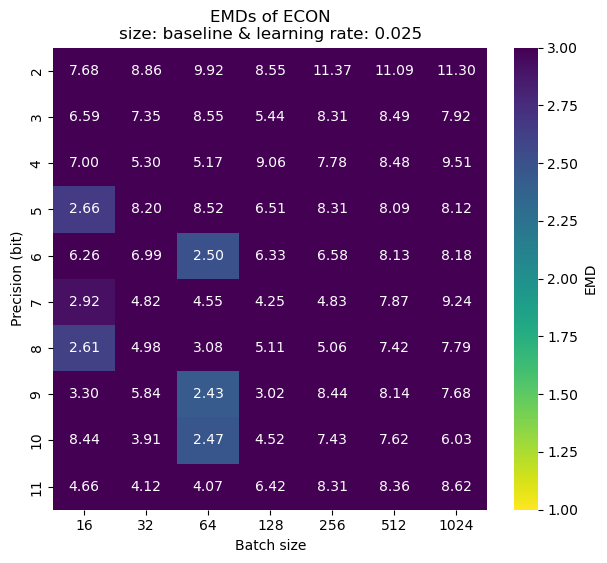

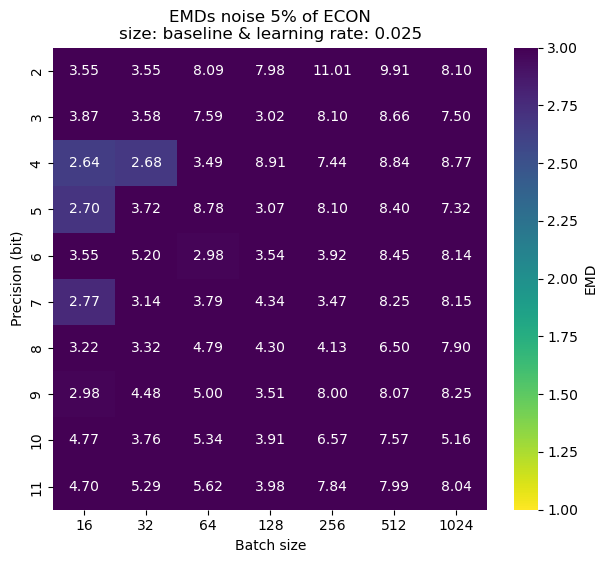

--------------------------------------------------------------------------------


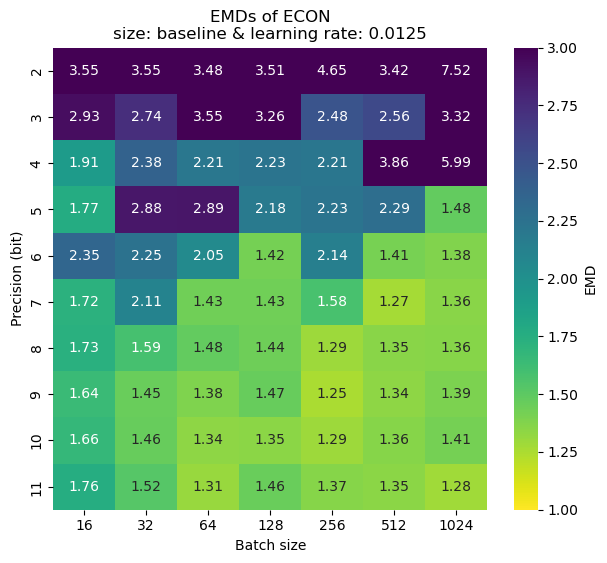

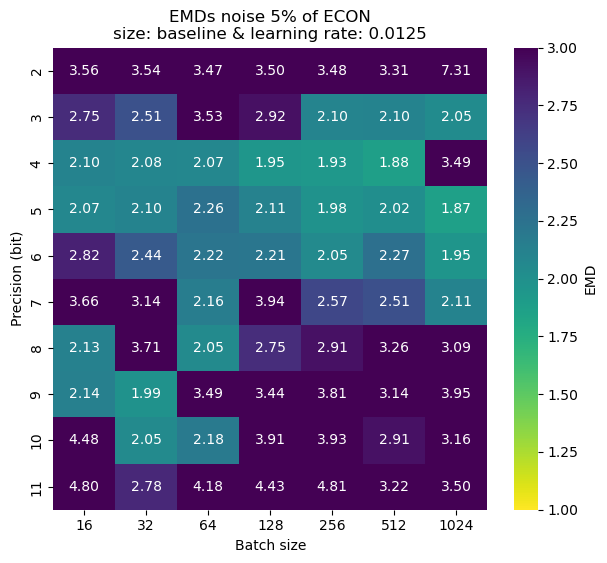

--------------------------------------------------------------------------------


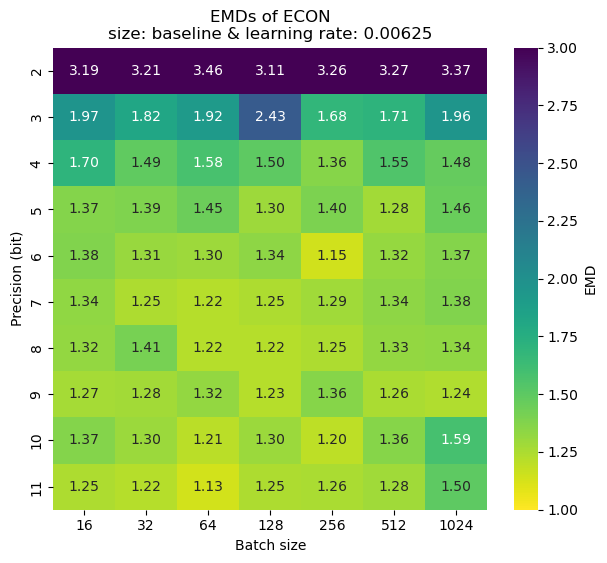

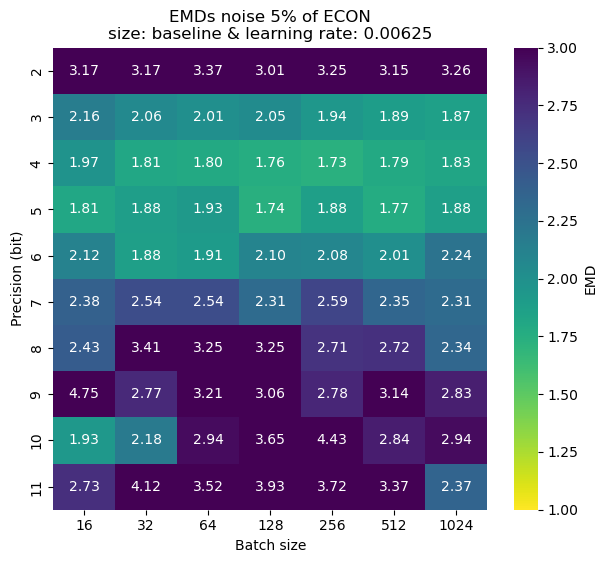

--------------------------------------------------------------------------------


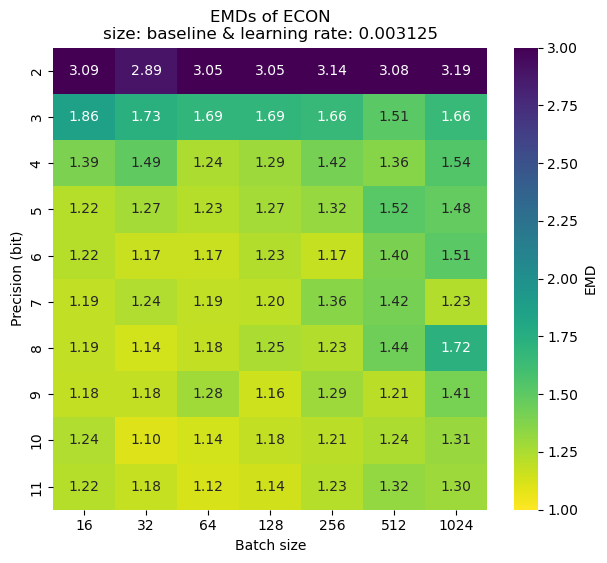

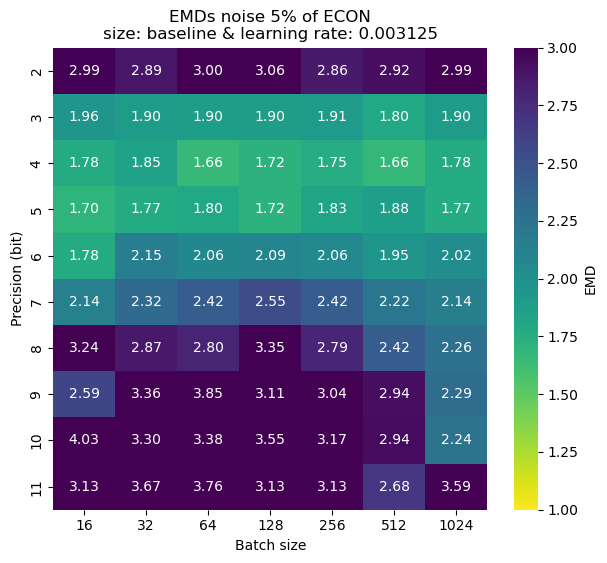

--------------------------------------------------------------------------------


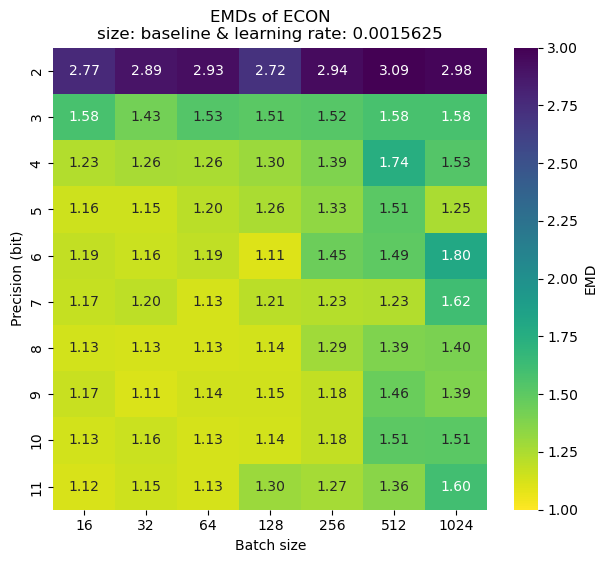

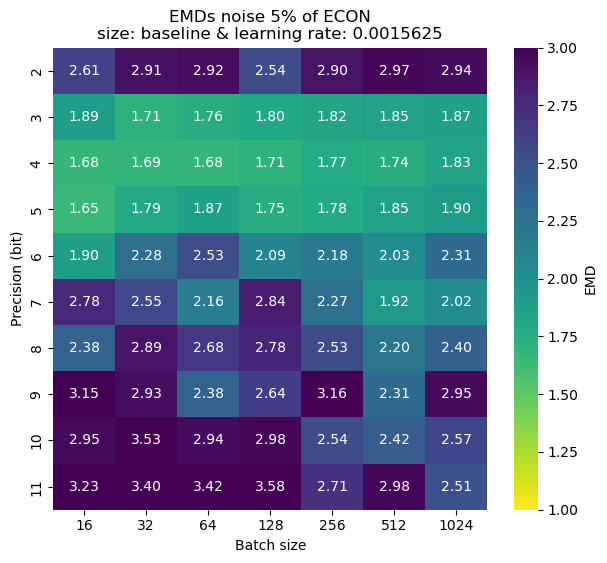

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:1

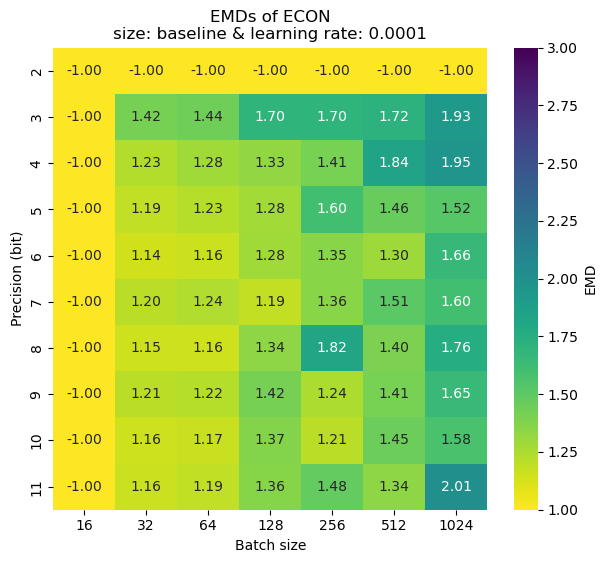

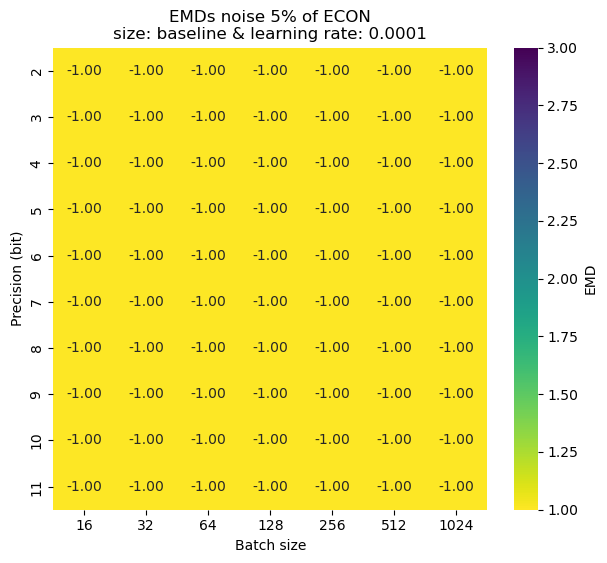

/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.00001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs32_lr0.00001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs64_lr0.00001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs128_lr0.00001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441

--------------------------------------------------------------------------------


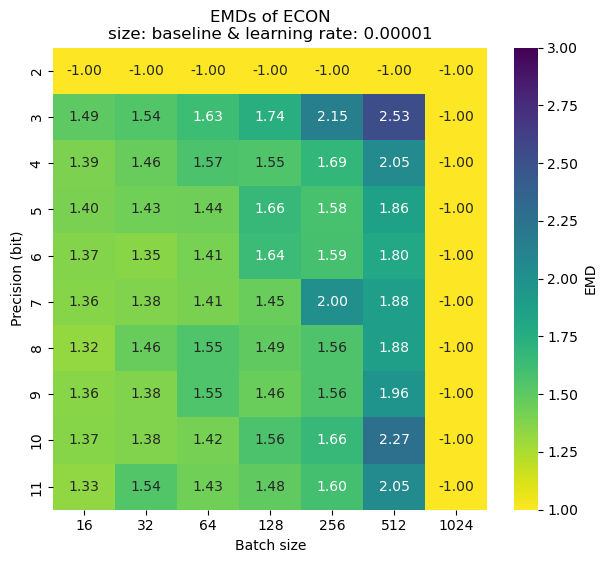

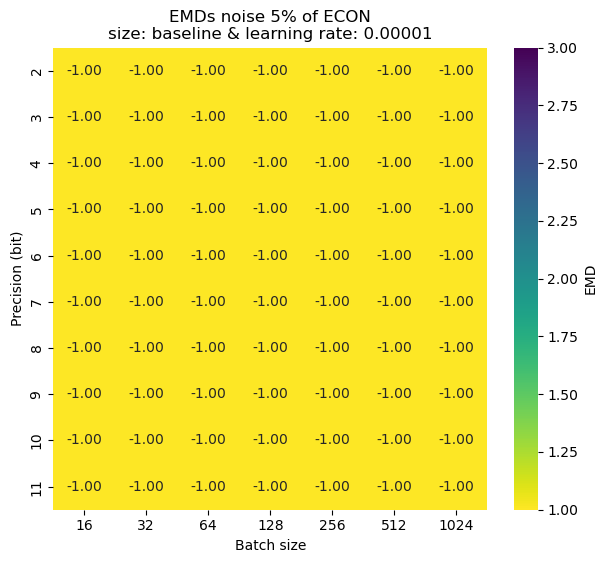

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.000001/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478

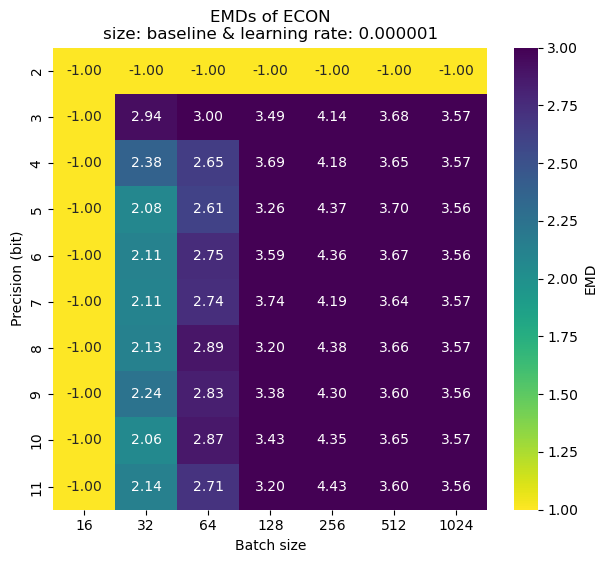

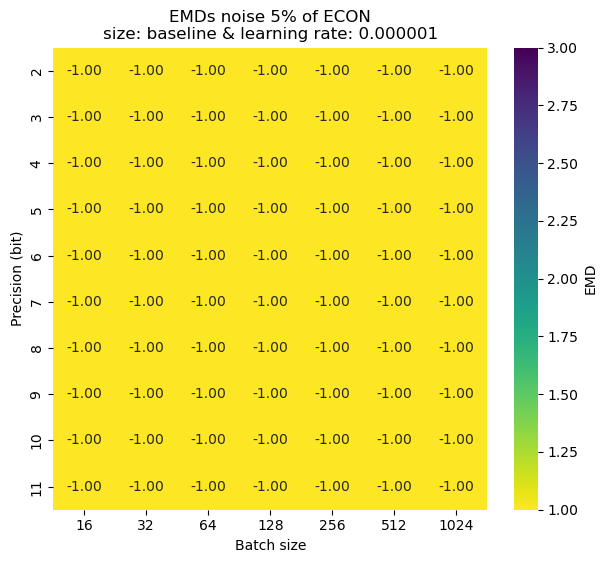

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/2800478441.py:19: UserWarning: No EMD values found for the model: bs16_lr0.0000001/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_515370/280

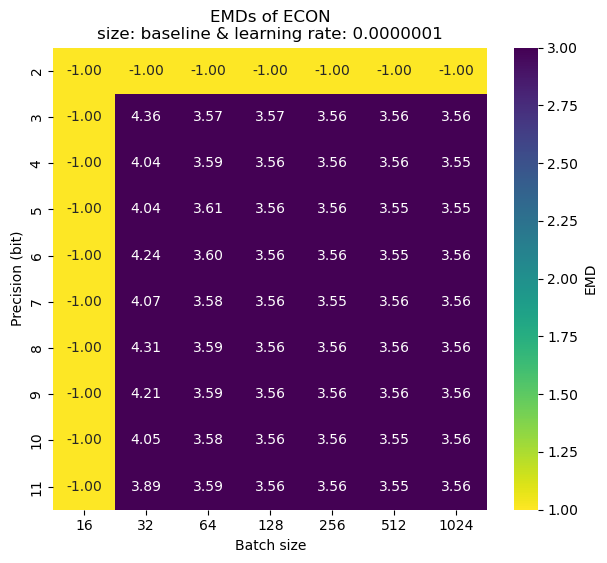

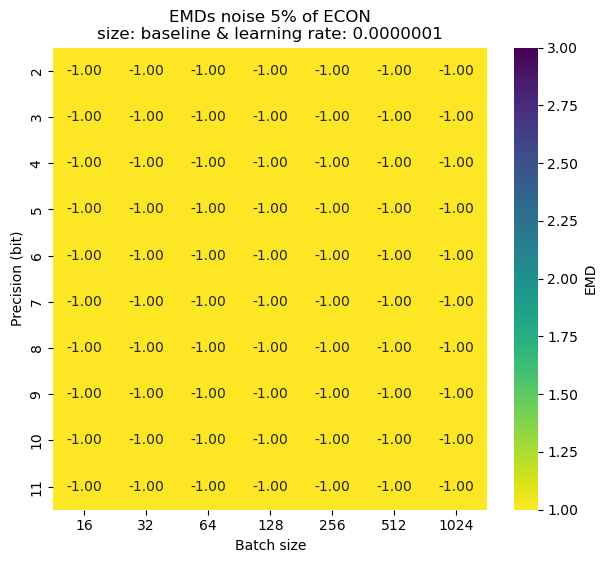

In [29]:

for lr in learning_rates:
    matrix = np.zeros((len(precisions), len(batch_sizes)))
    noise_matrix = np.zeros((len(precisions), len(batch_sizes)))
    for y, bs in enumerate(batch_sizes):
        for x, p in enumerate(precisions):
            
            # get the performances with and without noise
            mean_emd = get_emd(DATA_PATH, bs, lr, p, size)
            noise_emd_5 = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, 5)
            
            # build the heatmap matrix
            matrix[x, y] = mean_emd
            noise_matrix[x, y] = noise_emd_5

            
    # plot the heatmaps per precision
    matrix = pd.DataFrame(matrix, 
                          index=precisions, 
                          columns=batch_sizes)
    noise_matrix = pd.DataFrame(noise_matrix, 
                          index=precisions, 
                          columns=batch_sizes)
    print(80*'-')
    plot_2d_heatmap(matrix, 
                    f'EMDs of ECON\nsize: {size} & learning rate: {lr}', 
                    (1, 3),
                    'Batch size',
                    'Precision (bit)',
                    'EMD',
                    cmap='viridis_r')
    
    plot_2d_heatmap(noise_matrix, 
                    f'EMDs noise 5% of ECON\nsize: {size} & learning rate: {lr}', 
                    (1, 3),
                    'Batch size',
                    'Precision (bit)',
                    'EMD',
                    cmap='viridis_r')
    

# RN08 (TinyResNet)
Computer vision tasks trained on CIFAR10

In [ ]:
# search space
batch_sizes = [16, 32, 64, 128, 256, 512, 1024]
learning_rates = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]
precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [ ]:
DATA_PATH="/data/tbaldi/work/checkpoint/"   
DATASET_DIR = "/data/tbaldi/work/loss_landscape_taxonomy/data/RN08/"

## Accuracy results

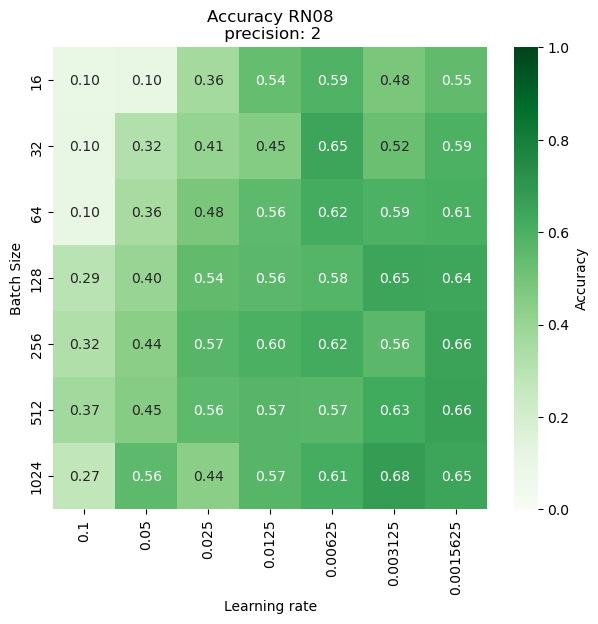

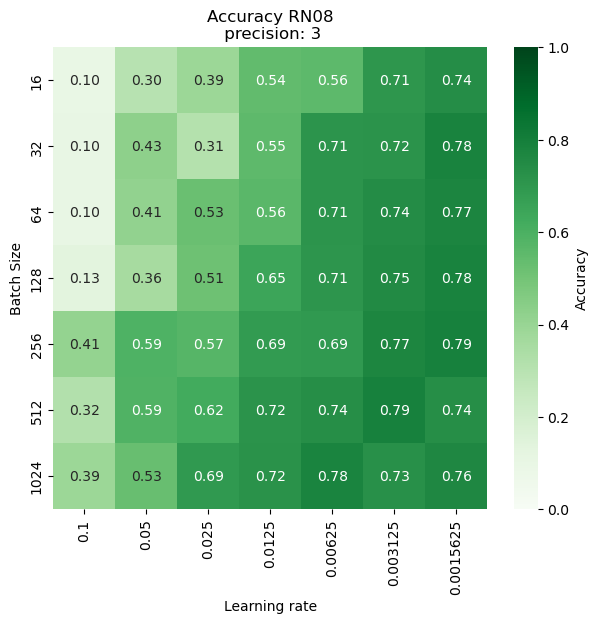

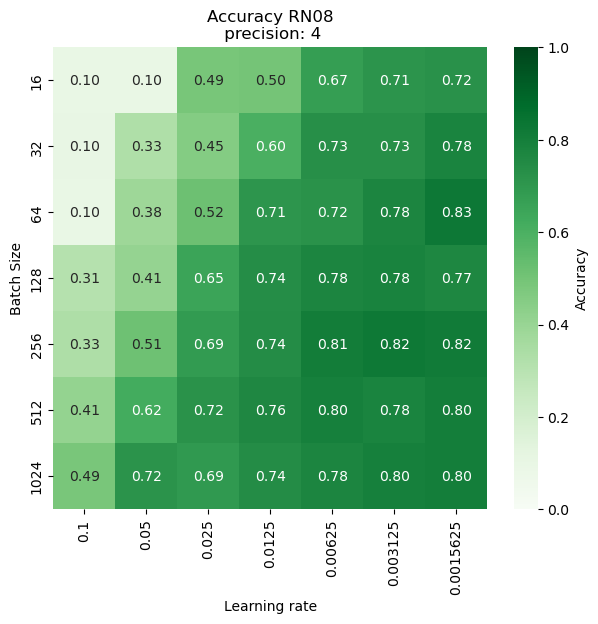

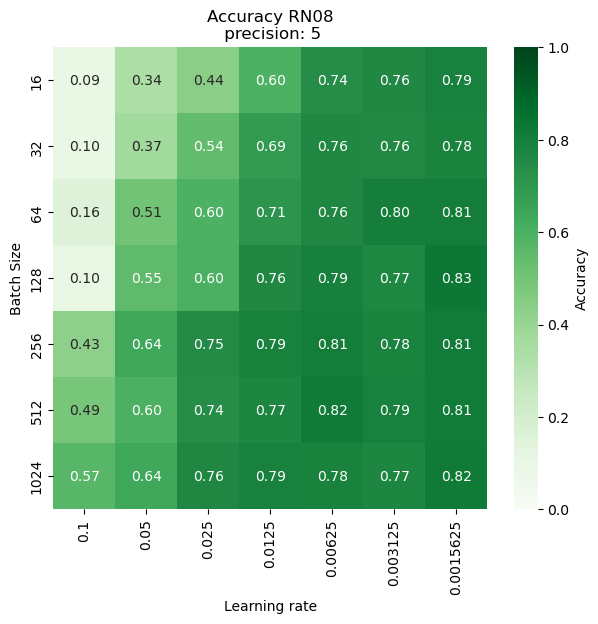

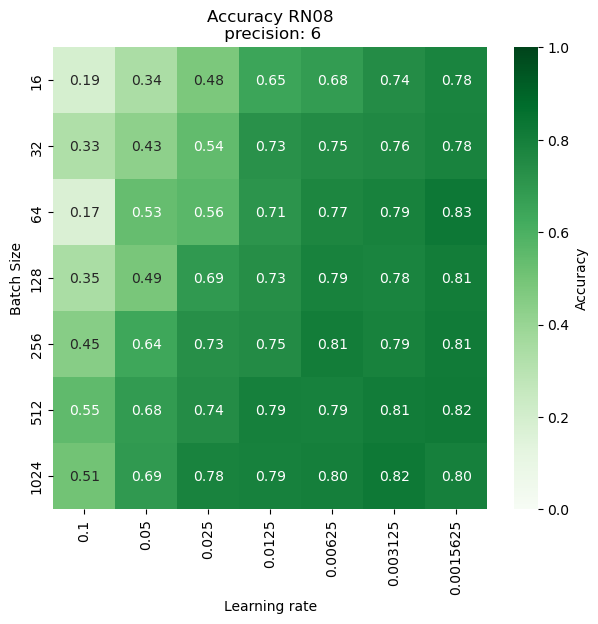

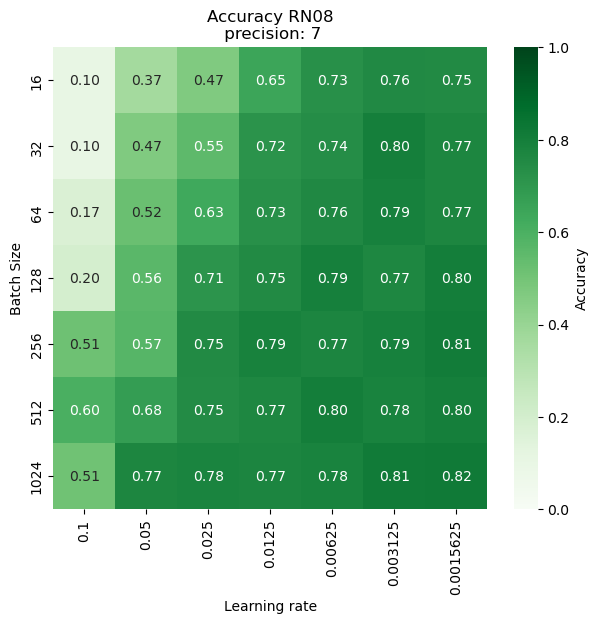

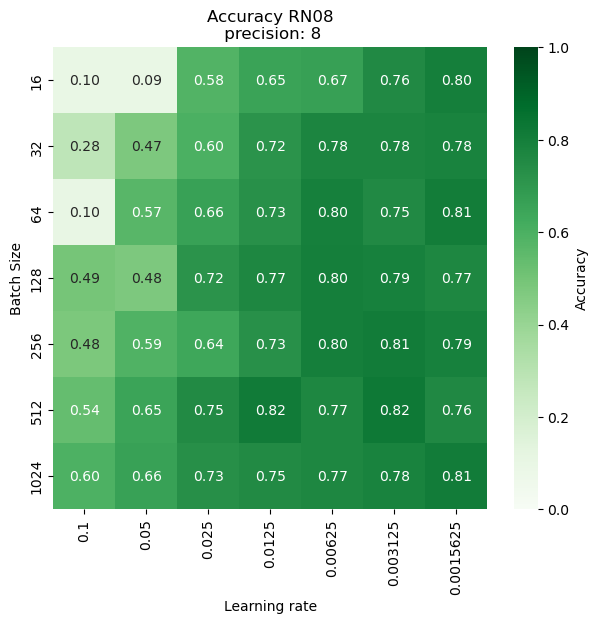

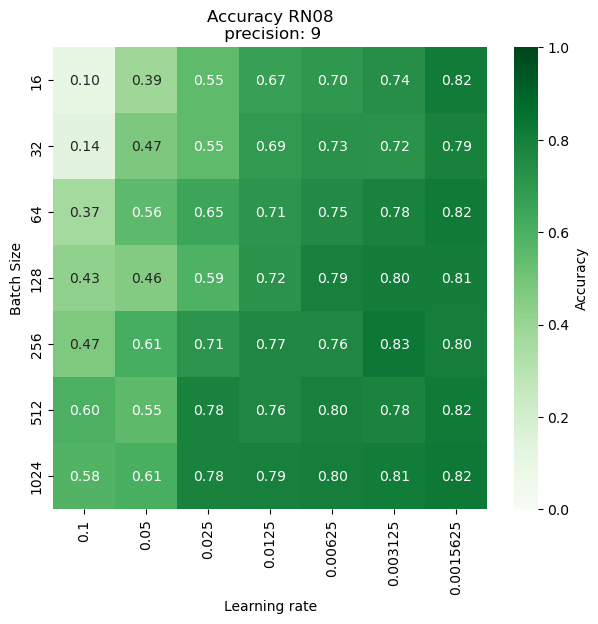

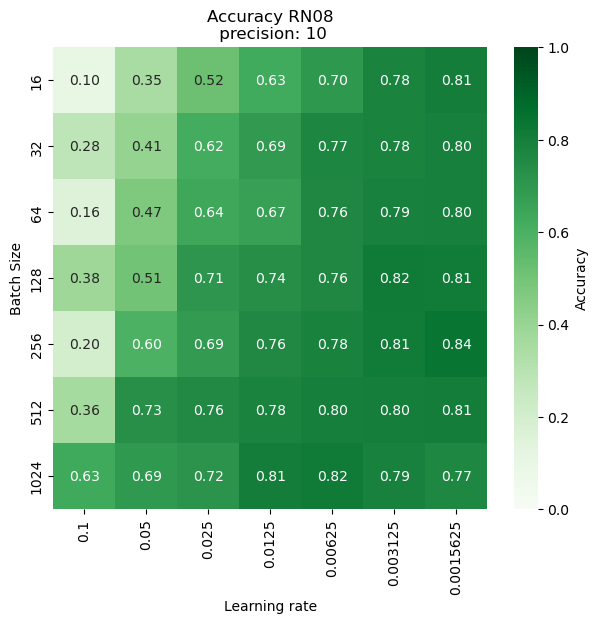

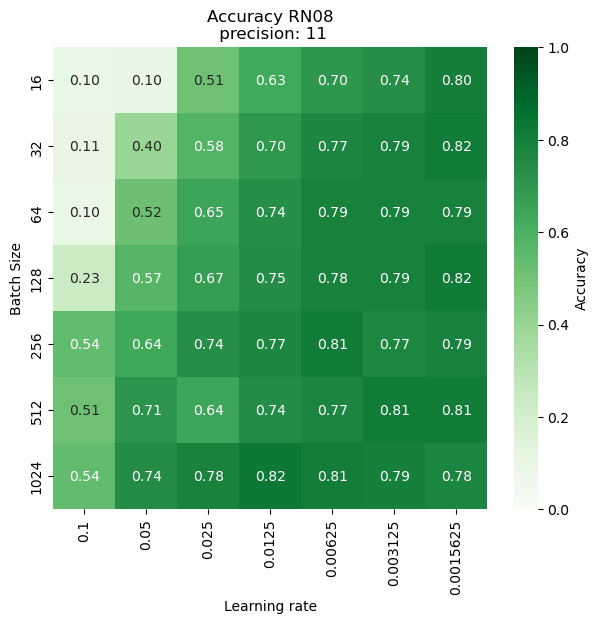

In [ ]:
# plotting a heat map per layer
for p in precisions:
    matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    for x, bs in enumerate(batch_sizes):
        for y, lr in enumerate(learning_rates):
            acc = rn08.get_accuracy(DATA_PATH, bs, lr, p)
            matrix[x, y] = acc
            
            
    matrix = pd.DataFrame(matrix, 
                          index=batch_sizes, 
                          columns=learning_rates)
    
    plot_2d_heatmap(matrix, 
                    f'Accuracy RN08\n precision: {p}', 
                    (0, 1),
                    'Learning rate',
                    'Batch Size',
                    'Accuracy',
                    cmap='Greens')

## Scientific Benchmark

In [ ]:

noise_type = "pixelate"
precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

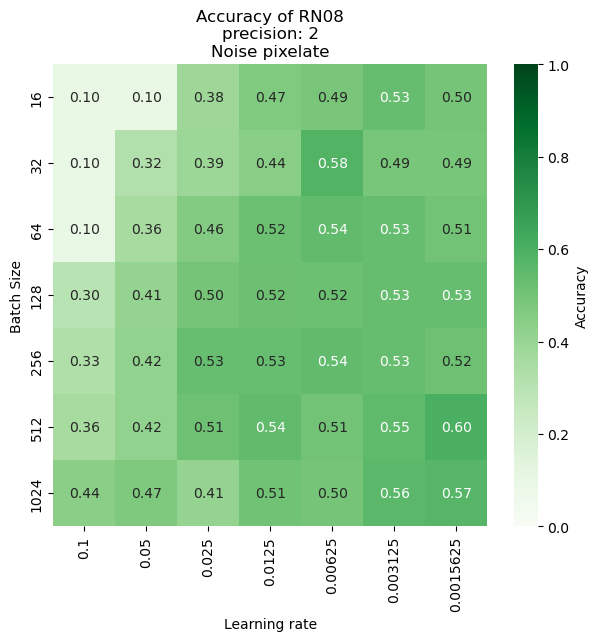

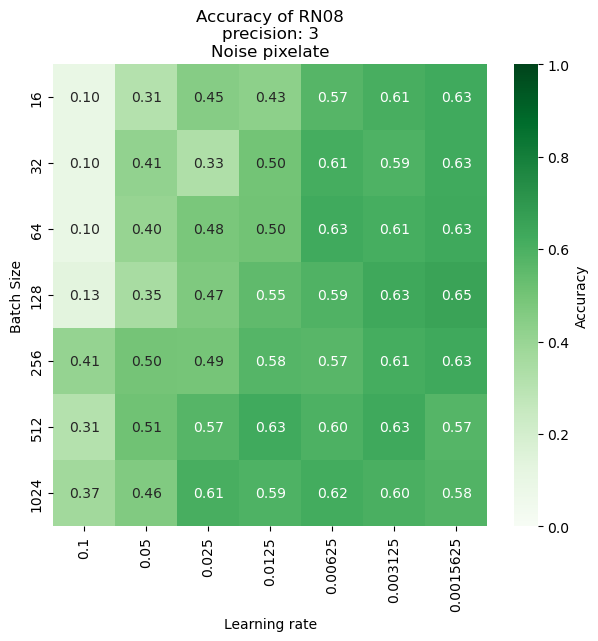

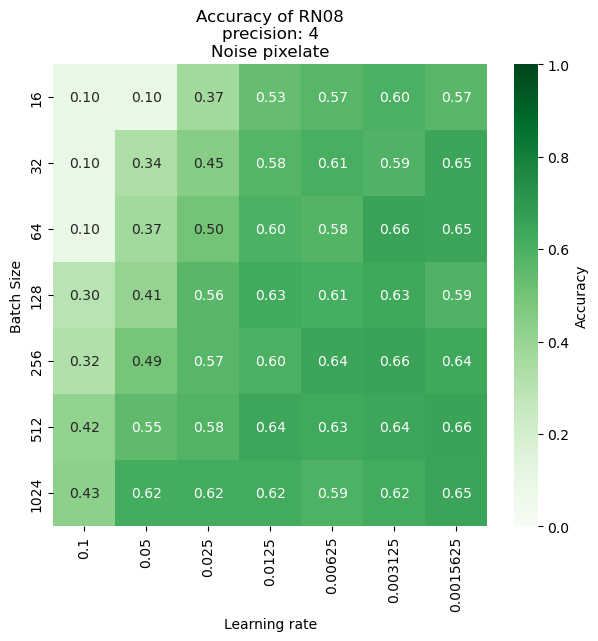

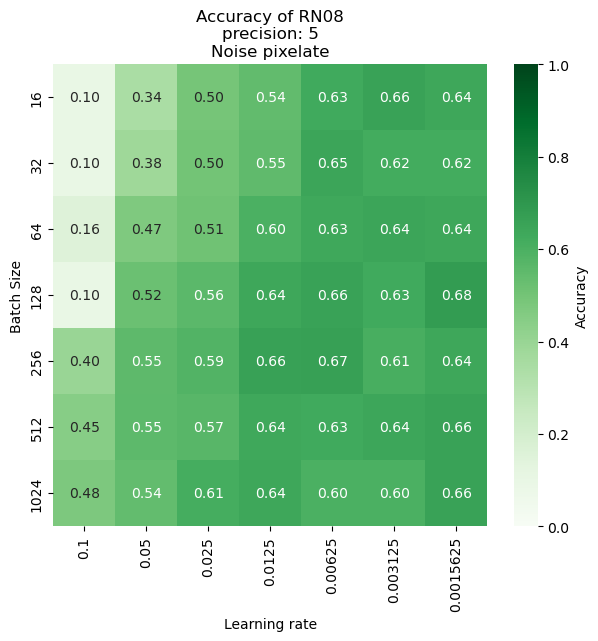

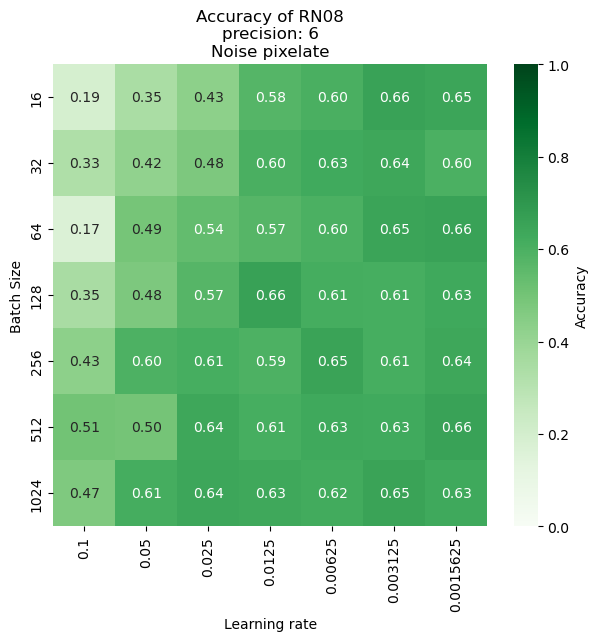

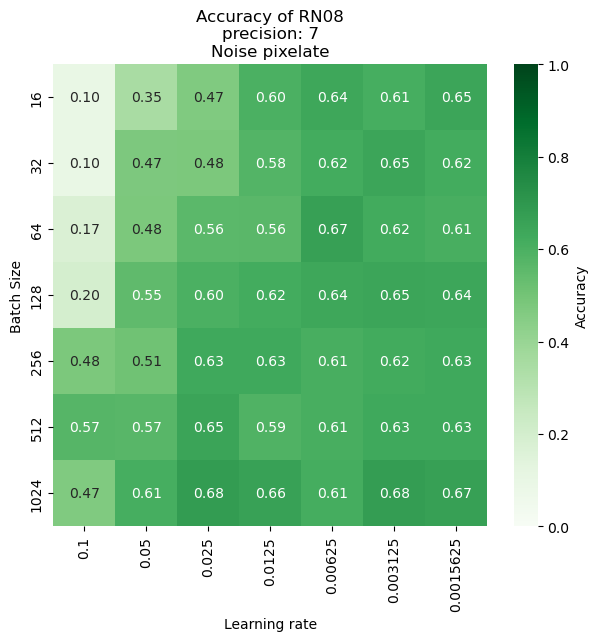

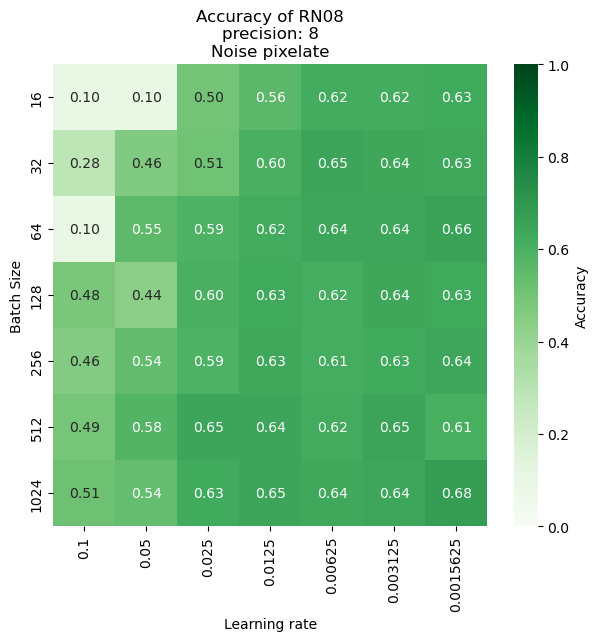

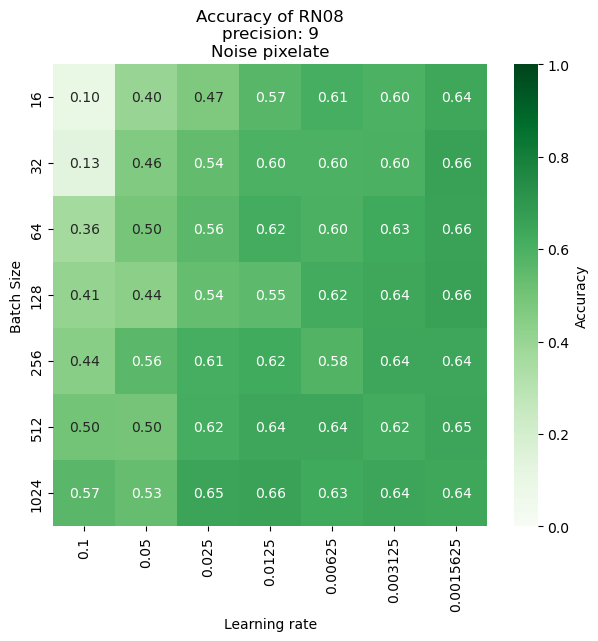

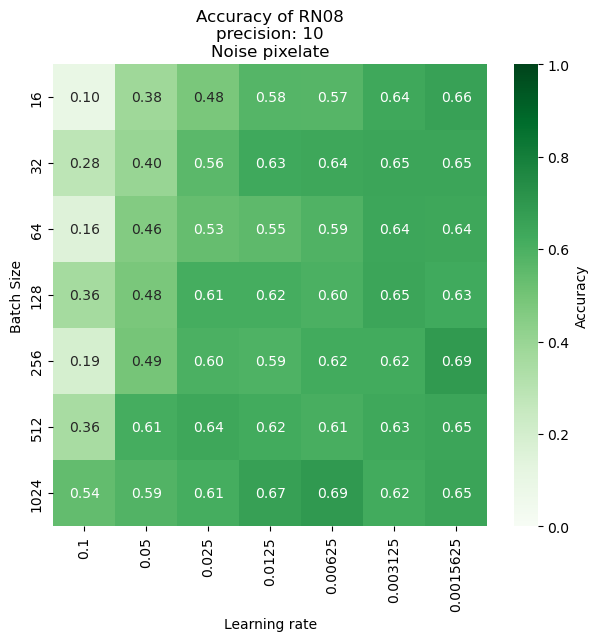

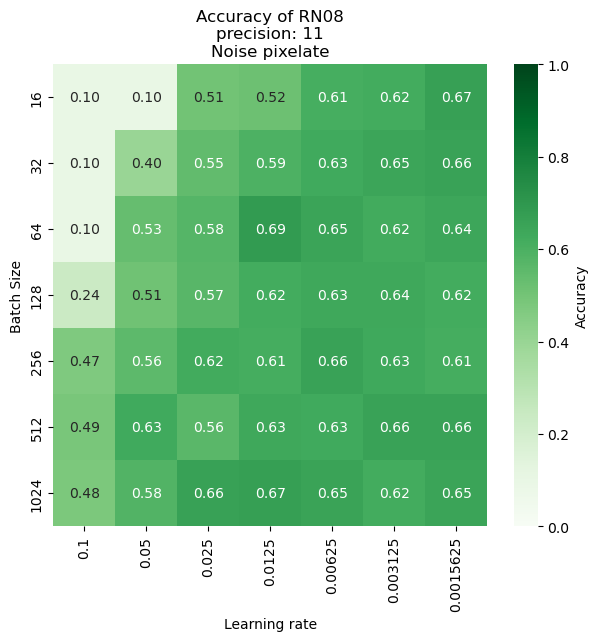

In [ ]:
acc_distribution = []
for p in precisions:
    matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    for x, bs in enumerate(batch_sizes):
        for y, lr in enumerate(learning_rates):
            acc = rn08.get_accuracy(DATA_PATH, bs, lr, p)
            noise_acc = rn08.get_accuracy_with_noise(DATA_PATH, bs, lr, p, noise_type)
            
            matrix[x, y] = noise_acc
            
            acc_distribution.append({
                'precision': p, 
                'accuracy': acc,
                'noise accuracy': noise_acc,
                'batch_size': str(bs),
                'learning_rate': str(lr),
                'precision': p,
            })
            
    matrix = pd.DataFrame(matrix,
                          index=batch_sizes,
                          columns=learning_rates)
    
    plot_2d_heatmap(matrix, 
                    f'Accuracy of RN08\nprecision: {p}\n' \
                    f'Noise {noise_type}', 
                    (0, 1),
                    'Learning rate',
                    'Batch Size',
                    'Accuracy',
                    cmap='Greens')

In [ ]:
acc_distribution_df = pd.DataFrame(acc_distribution)
# export the CSV
acc_distribution_df.to_csv("./results/rn08/noise.csv", index=False)

--------------------------------------------------------------------------------


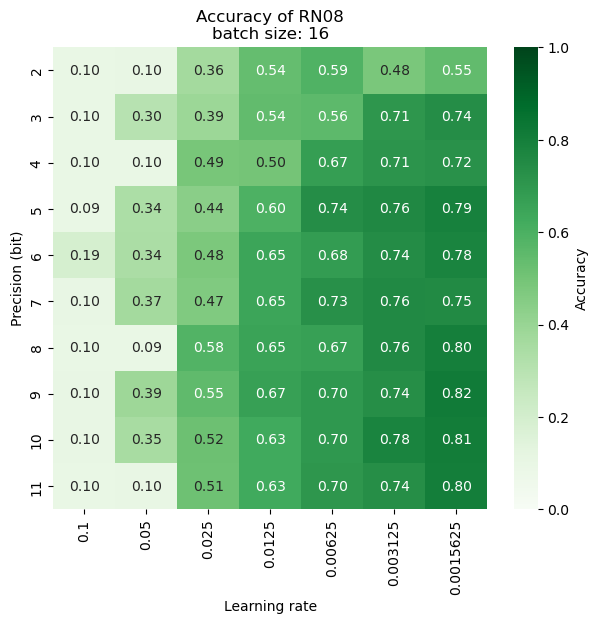

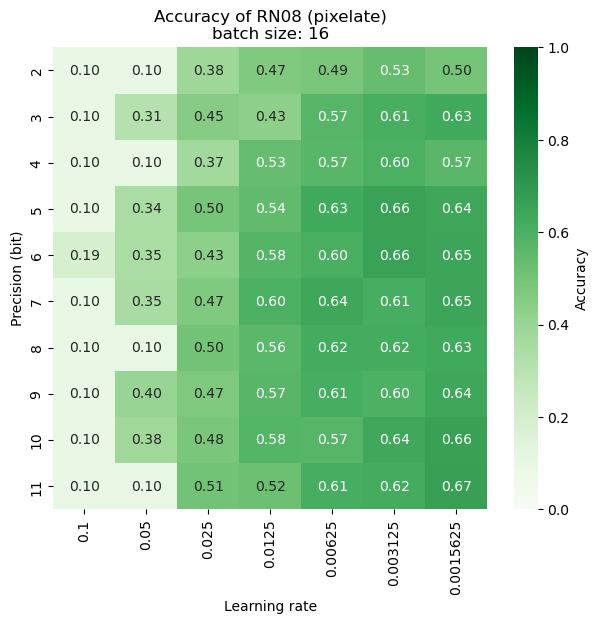

--------------------------------------------------------------------------------


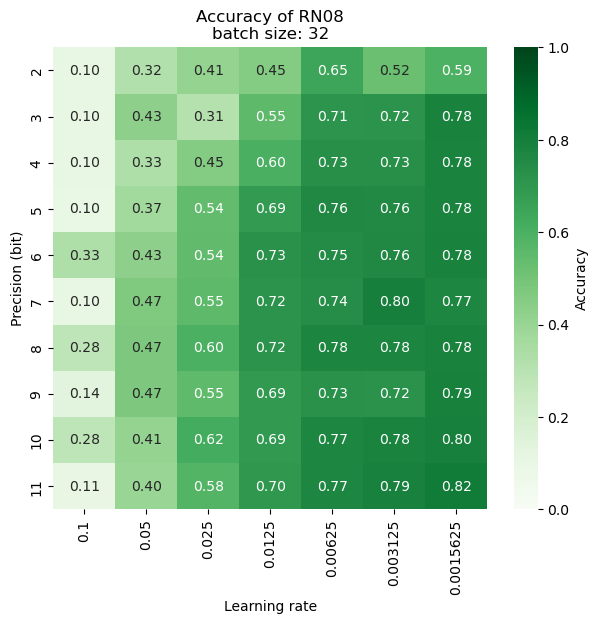

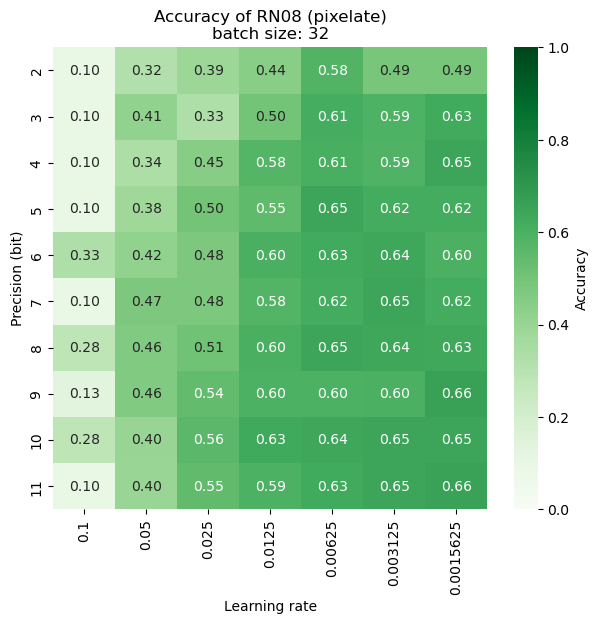

--------------------------------------------------------------------------------


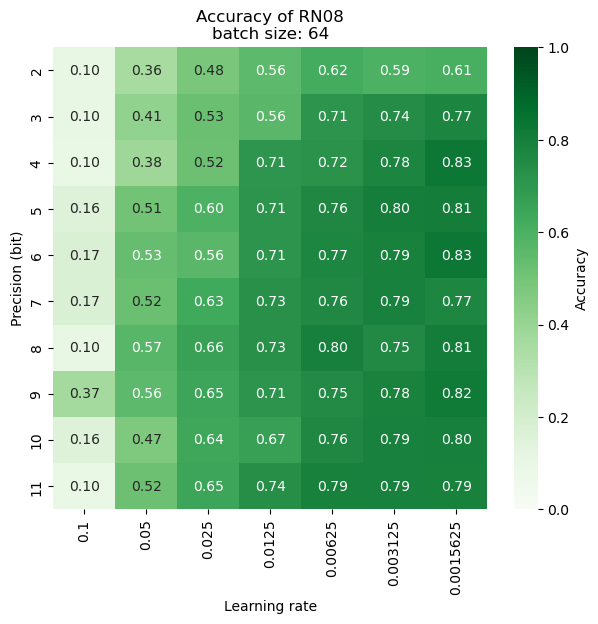

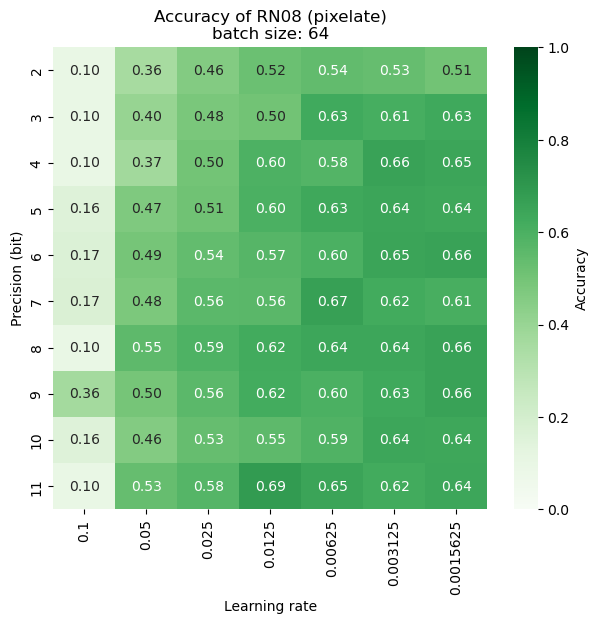

--------------------------------------------------------------------------------


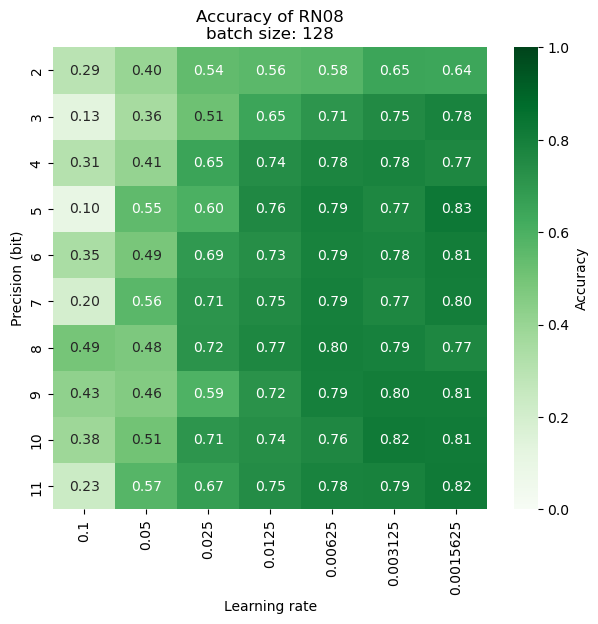

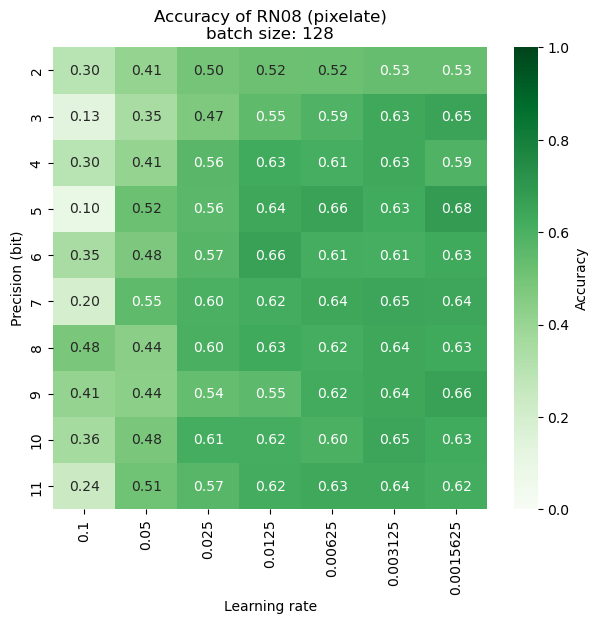

--------------------------------------------------------------------------------


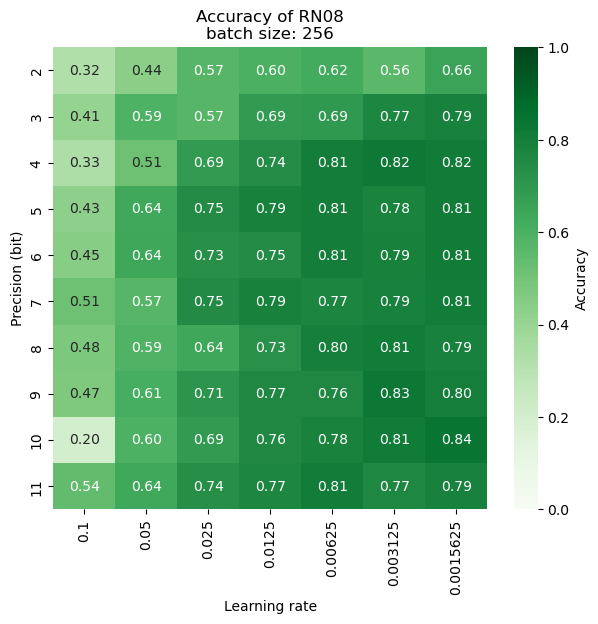

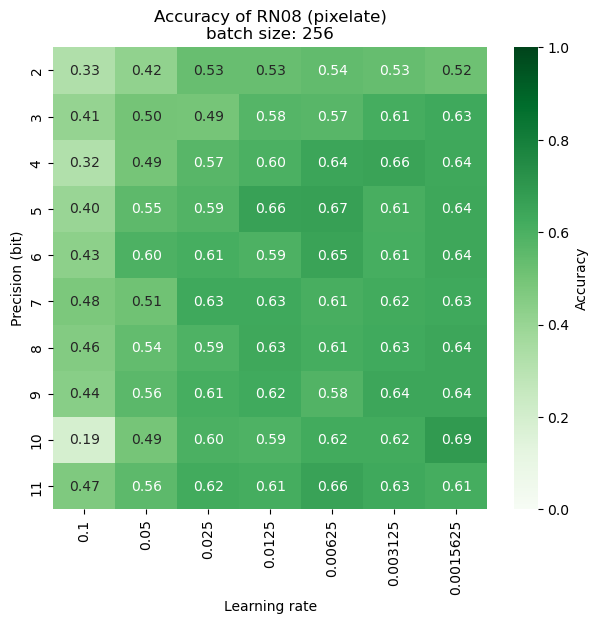

--------------------------------------------------------------------------------


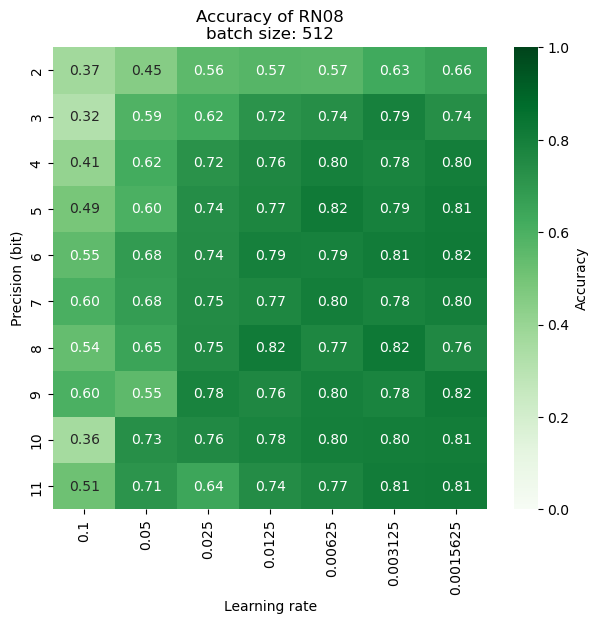

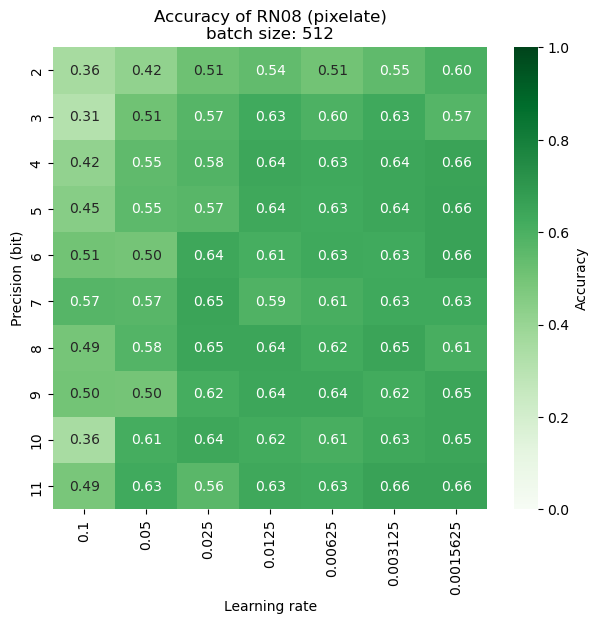

--------------------------------------------------------------------------------


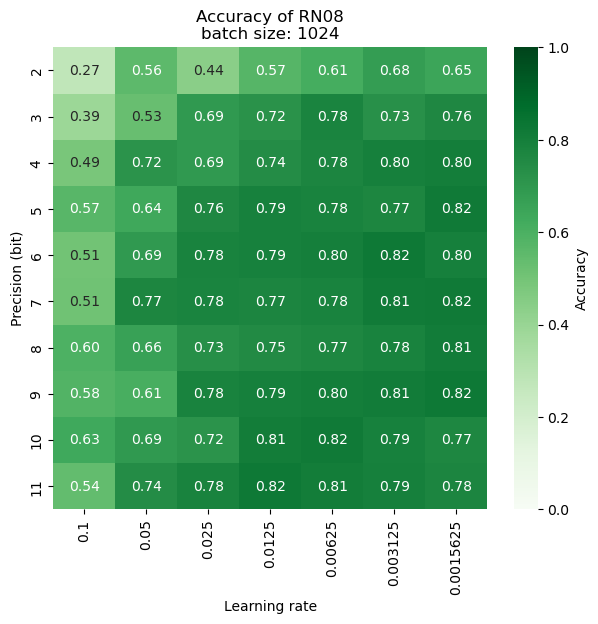

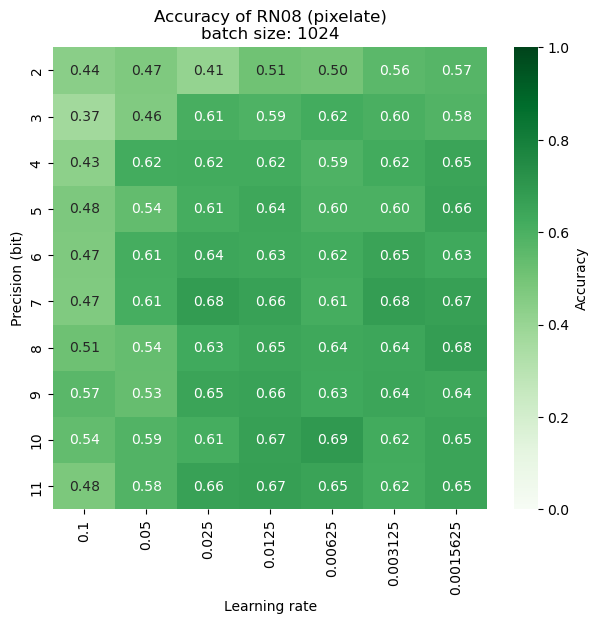

In [ ]:

for bs in batch_sizes:
    matrix = np.zeros((len(precisions), len(learning_rates)))
    noise_matrix = np.zeros((len(precisions), len(learning_rates)))
    for y, lr in enumerate(learning_rates):
        for x, p in enumerate(precisions):
            
            # get the performances with and without noise
            acc = rn08.get_accuracy(DATA_PATH, bs, lr, p)
            noise_acc = rn08.get_accuracy_with_noise(DATA_PATH, bs, lr, p, noise_type)
            
            # build the heatmap matrix
            matrix[x, y] = acc
            noise_matrix[x, y] = noise_acc

            
    # plot the heatmaps per precision
    matrix = pd.DataFrame(matrix, 
                          index=precisions, 
                          columns=learning_rates)
    noise_matrix = pd.DataFrame(noise_matrix, 
                          index=precisions, 
                          columns=learning_rates)
    print(80*'-')
    plot_2d_heatmap(matrix, 
                    f'Accuracy of RN08\nbatch size: {bs}', 
                    (0, 1),
                    'Learning rate',
                    'Precision (bit)',
                    'Accuracy',
                    cmap='Greens')
    
    plot_2d_heatmap(noise_matrix, 
                    f'Accuracy of RN08 ({noise_type})\nbatch size: {bs}', 
                    (0, 1),
                    'Learning rate',
                    'Precision (bit)',
                    'Accuracy',
                    cmap='Greens')

--------------------------------------------------------------------------------


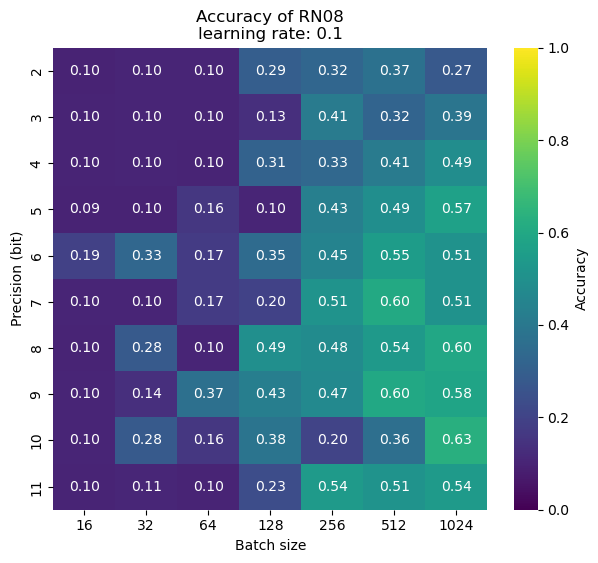

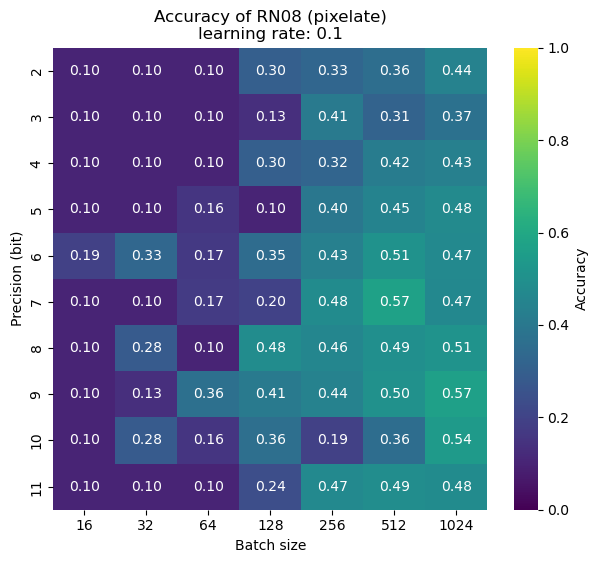

--------------------------------------------------------------------------------


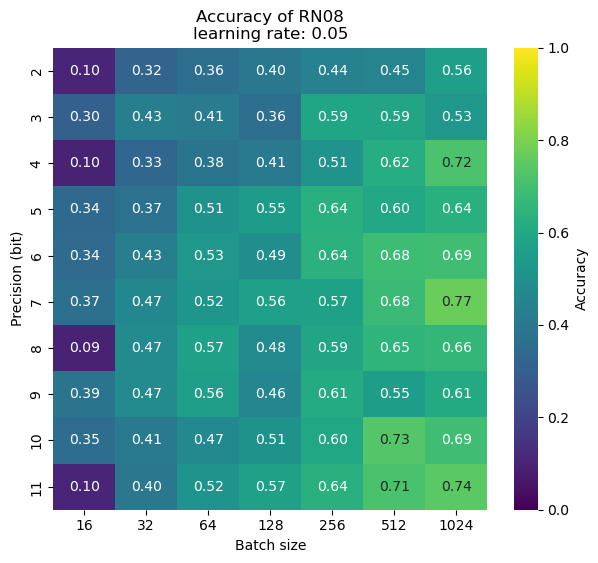

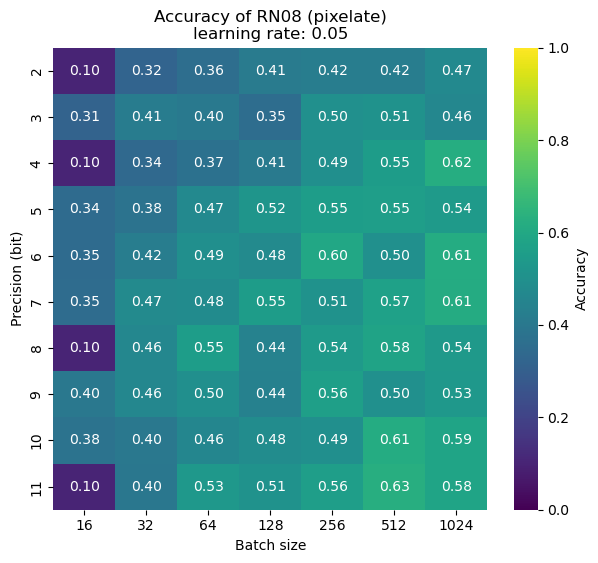

--------------------------------------------------------------------------------


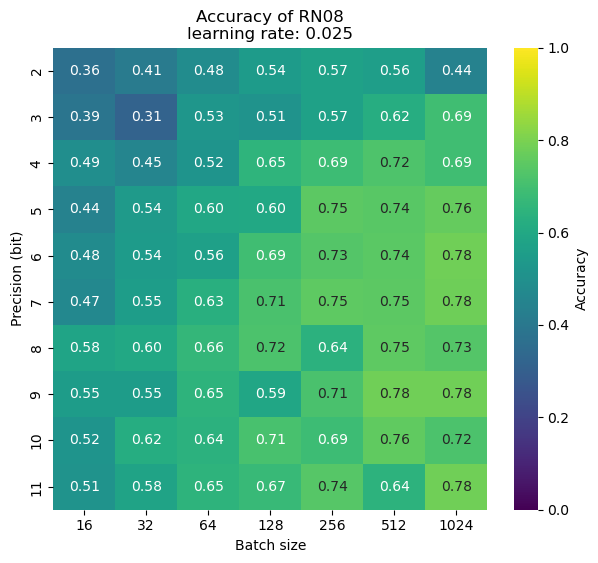

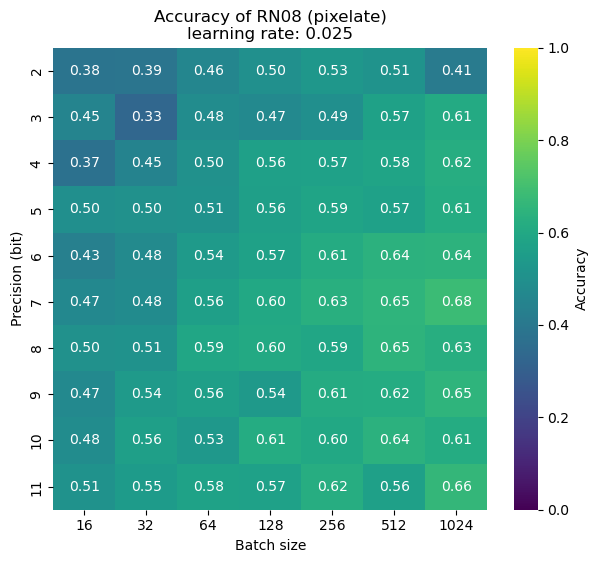

--------------------------------------------------------------------------------


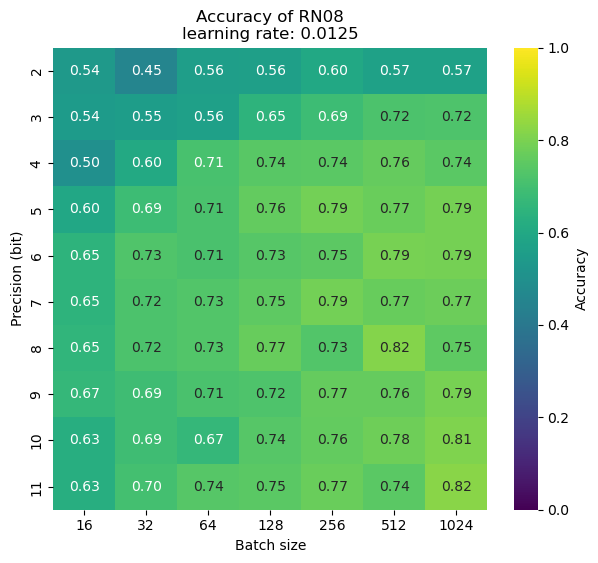

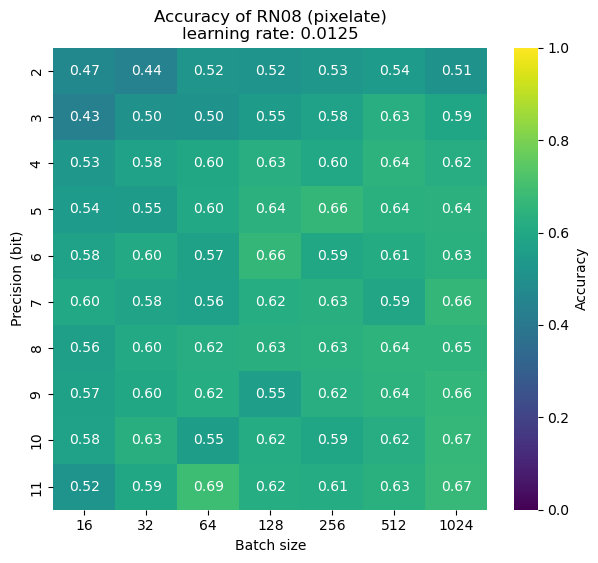

--------------------------------------------------------------------------------


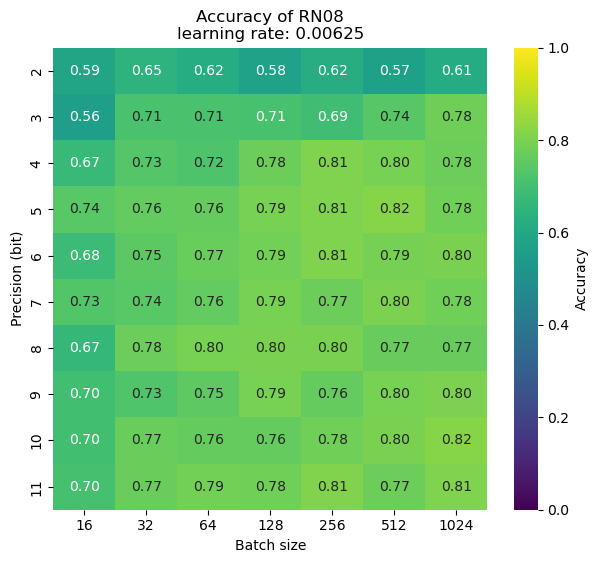

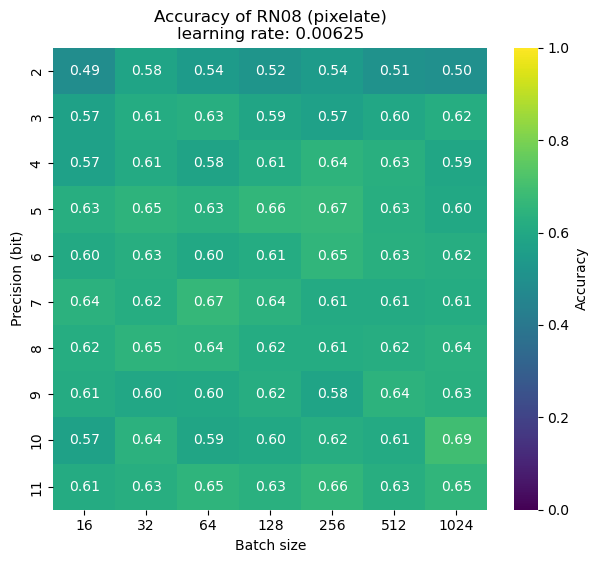

--------------------------------------------------------------------------------


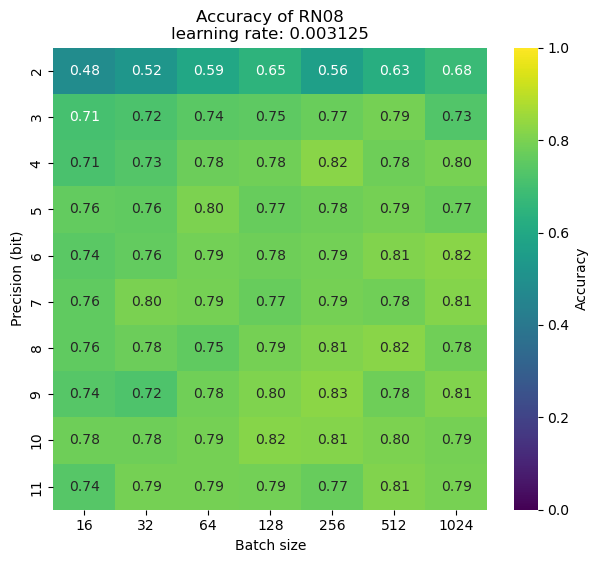

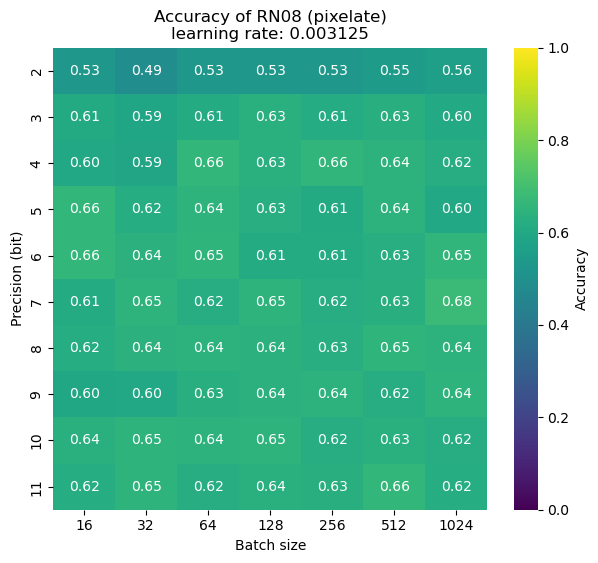

--------------------------------------------------------------------------------


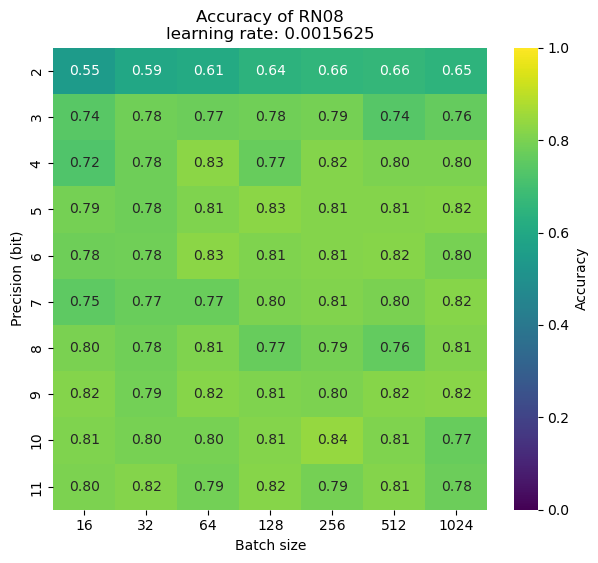

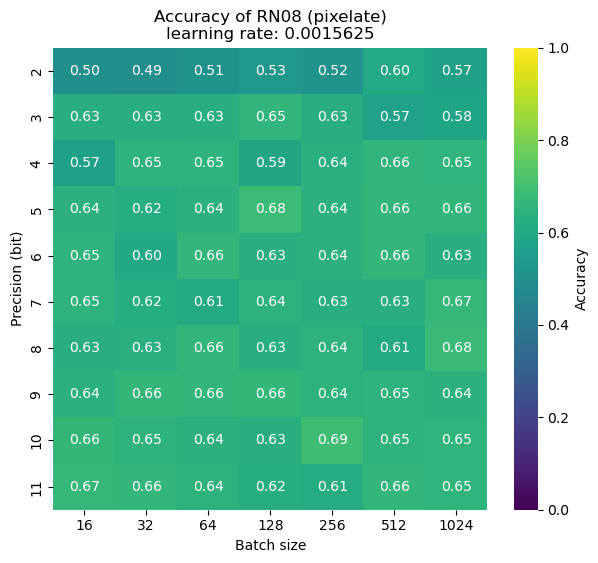

In [ ]:

for lr in learning_rates:
    matrix = np.zeros((len(precisions), len(learning_rates)))
    noise_matrix = np.zeros((len(precisions), len(learning_rates)))
    for y, bs in enumerate(batch_sizes):
        for x, p in enumerate(precisions):
            
            # get the performances with and without noise
            acc = rn08.get_accuracy(DATA_PATH, bs, lr, p)
            noise_acc = rn08.get_accuracy_with_noise(DATA_PATH, bs, lr, p, noise_type)
            
            # build the heatmap matrix
            matrix[x, y] = acc
            noise_matrix[x, y] = noise_acc

            
    # plot the heatmaps per precision
    matrix = pd.DataFrame(matrix, 
                          index=precisions, 
                          columns=batch_sizes)
    noise_matrix = pd.DataFrame(noise_matrix, 
                          index=precisions, 
                          columns=batch_sizes)
    print(80*'-')
    plot_2d_heatmap(matrix, 
                    f'Accuracy of RN08\nlearning rate: {lr}', 
                    (0, 1),
                    'Batch size',
                    'Precision (bit)',
                    'Accuracy',
                    cmap='viridis')
    
    plot_2d_heatmap(noise_matrix, 
                    f'Accuracy of RN08 ({noise_type})\nlearning rate: {lr}', 
                    (0, 1),
                    'Batch size',
                    'Precision (bit)',
                    'Accuracy',
                    cmap='viridis')